<a href="https://colab.research.google.com/github/KartikayMann/BitPredict/blob/main/BitPredict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BitCoin Price Prediction

## Get data

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving BTC-USD.csv to BTC-USD.csv


## Importing time series with pandas

In [ ]:
import pandas as pd

# lets read the bitcoin data and parse dates
df=pd.read_csv("/content/BTC-USD.csv",
               parse_dates=["Date"],
               index_col=["Date"]) # parse the date column and tell pandas column 1 is a datetime


In [ ]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2760 entries, 2014-09-17 to 2022-04-07
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2760 non-null   float64
 1   High       2760 non-null   float64
 2   Low        2760 non-null   float64
 3   Close      2760 non-null   float64
 4   Adj Close  2760 non-null   float64
 5   Volume     2760 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 150.9 KB


In [ ]:
# how many samples do we have?
len(df)

2760

**NOTE:** The **seasonality** of a time series dataset is referred as the number of samples per year. So for this Bitcoin data, it has a seasonality of daily or a value of 365 because we collect one sample per day meaning we'll get 365 samples per year.

In [ ]:
# Only want closing price for each day
bitcoin_prices=pd.DataFrame(df["Close"]).rename(columns={"Close":"Price"})
bitcoin_prices.head()

,Price
Date,
2014-09-17,457.334015
2014-09-18,424.440002
2014-09-19,394.795990
2014-09-20,408.903992
2014-09-21,398.821014


In [ ]:
bitcoin_prices.tail()

,Price
Date,
2022-04-03,46453.566406
2022-04-04,46622.675781
2022-04-05,45555.992188
2022-04-06,43206.738281
2022-04-07,43503.847656


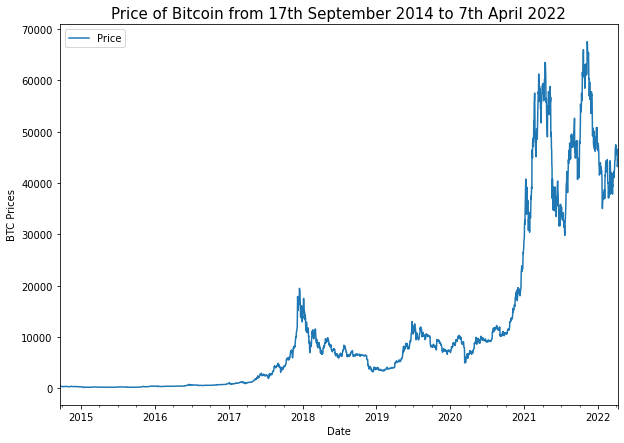

In [ ]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10,7))
plt.ylabel("BTC Prices")
plt.title("Price of Bitcoin from 17th September 2014 to 7th April 2022",fontsize=15)
plt.legend(fontsize=10)

## Importing time series data with Python's CSV module

In [ ]:
# Importing and formatting historical Bitcoin data with python

import csv
from datetime import datetime

timesteps=[]
btc_price=[]

with open("/content/BTC-USD.csv","r") as f:
  csv_reader=csv.reader(f,delimiter=",")
  next(csv_reader) # skip first line (get rid of column titles)
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[0],"%Y-%m-%d")) # get dates as dates
    btc_price.append(float(line[4])) # get the closing price as float
  
# view first 10 of each
timesteps[:10],btc_price[:10]

([datetime.datetime(2014, 9, 17, 0, 0),
  datetime.datetime(2014, 9, 18, 0, 0),
  datetime.datetime(2014, 9, 19, 0, 0),
  datetime.datetime(2014, 9, 20, 0, 0),
  datetime.datetime(2014, 9, 21, 0, 0),
  datetime.datetime(2014, 9, 22, 0, 0),
  datetime.datetime(2014, 9, 23, 0, 0),
  datetime.datetime(2014, 9, 24, 0, 0),
  datetime.datetime(2014, 9, 25, 0, 0),
  datetime.datetime(2014, 9, 26, 0, 0)],
 [457.334015,
  424.440002,
  394.79599,
  408.903992,
  398.821014,
  402.152008,
  435.790985,
  423.204987,
  411.574005,
  404.424988])

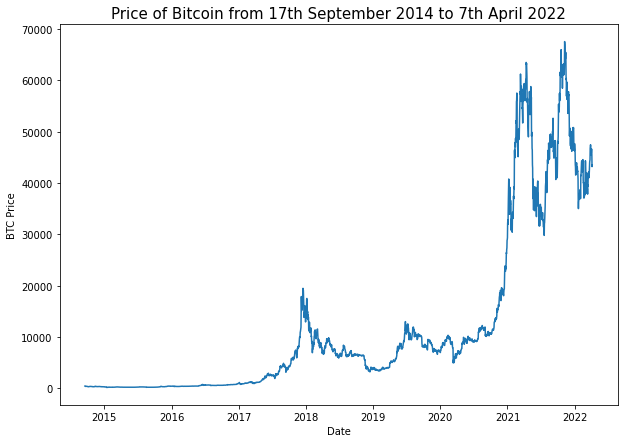

In [ ]:
# plot fomr CSV
plt.figure(figsize=(10,7))
plt.plot(timesteps,btc_price)
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 17th September 2014 to 7th April 2022",fontsize=15)
plt.xlabel("Date");

## Creating train and test sets of time series data

### Creating train and test sets with time series data (the wrong way)

In [ ]:
timesteps=bitcoin_prices.index.to_numpy()
prices=bitcoin_prices["Price"].to_numpy()

timesteps[:10],prices[:10]

(array(['2014-09-17T00:00:00.000000000', '2014-09-18T00:00:00.000000000',
        '2014-09-19T00:00:00.000000000', '2014-09-20T00:00:00.000000000',
        '2014-09-21T00:00:00.000000000', '2014-09-22T00:00:00.000000000',
        '2014-09-23T00:00:00.000000000', '2014-09-24T00:00:00.000000000',
        '2014-09-25T00:00:00.000000000', '2014-09-26T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([457.334015, 424.440002, 394.79599 , 408.903992, 398.821014,
        402.152008, 435.790985, 423.204987, 411.574005, 404.424988]))

In [ ]:
# wrong way to make train/test sets for series data
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(timesteps,
                                                 prices,
                                                 test_size=0.2,
                                                 random_state=42)

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((2208,), (552,), (2208,), (552,))

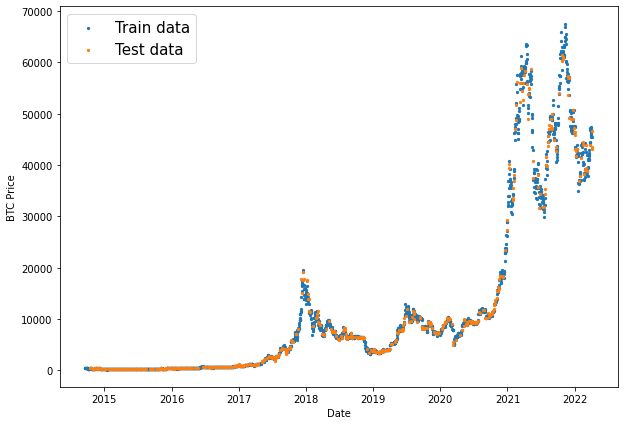

In [ ]:
# lets plot wrong train and test splits

plt.figure(figsize=(10,7))

plt.scatter(X_train,y_train,s=5,label="Train data")
plt.scatter(X_test,y_test,s=5,label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=15)
plt.show()

### Creating train and test sets with time series data (correct way)

In [ ]:
split_size=int(0.8*len(prices)) # 80% train, 20% test

# create train data splits
X_train,y_train=timesteps[:split_size],prices[:split_size]

# create test data splits
X_test,y_test=timesteps[split_size:],prices[split_size:]

len(X_train),len(X_test) ,len(y_train),len(y_test)

(2208, 552, 2208, 552)

In [ ]:
X_train[:2],y_train[:2]

(array(['2014-09-17T00:00:00.000000000', '2014-09-18T00:00:00.000000000'],
       dtype='datetime64[ns]'), array([457.334015, 424.440002]))

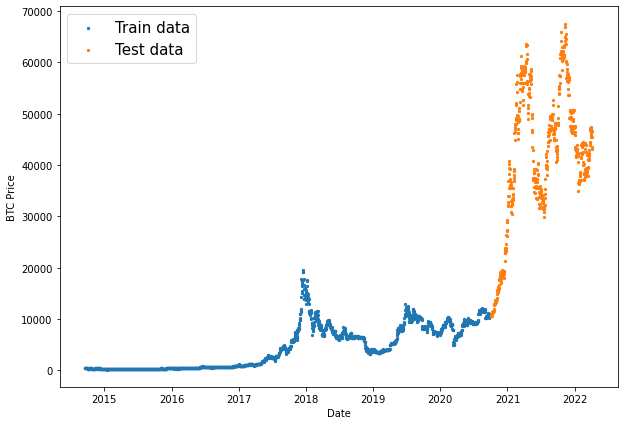

In [ ]:
# plot correctly made splits

plt.figure(figsize=(10,7))

plt.scatter(X_train,y_train,s=5,label="Train data")
plt.scatter(X_test,y_test,s=5,label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=15)
plt.show()

## create a plotting function

In [ ]:
# Create a function to plot time series data

def plot_time_series(timesteps,values,format=".",start=0,end=None,label=None):

  """
  Plots timesteps (a seeries of points in time) against values (a series of vales across timesteps)
  
  Parameters
  ----------
  timesteps : array of timesteps values
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps and values)
  end : where to end the plot
  label : label to show on plot about values
  """
  # plot the series
  
  plt.plot(timesteps[start:end],values[start:end],format,label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14) 
  plt.grid(True)


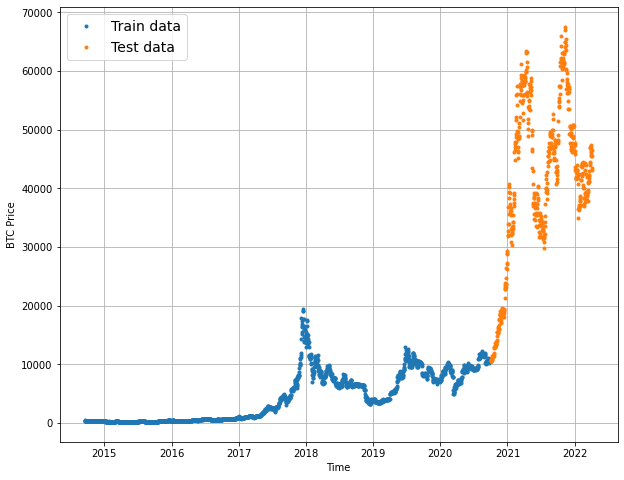

In [ ]:
plt.figure(figsize=(10,8))
plot_time_series(timesteps=X_train,values=y_train,label="Train data")
plot_time_series(timesteps=X_test,values=y_test,label="Test data")

## Modelling Experiments

**Terms:**
* **Horizon** : number of timesteps into the future we're going to predict.
* **Window Size** : the number of timesteps we're going to use to predict horizon.



**Modelling experiments:**

* Naive model (baseline) 
* Dense model, horizon=1,window=7
* Same as dense model,horizon=1,window=30
* Same as dense model, horizon=7,window=30
* Conv1D
* LSTM
* Same as dense model (but with multivariate data)
* N-BEATs
* Ensemble (multiple models optimised on different loss functions)
* Future prediction model (model to predict future values)


## Model 0 : Naive forecast (baseline)

the formula :

$$\hat{y}=y_{t-1}$$


> The prediction at timestamp t (y-hat) is equal to the value at timestep t-1 (previous timestep), this is for a horizon of 1.

In [ ]:
# create a naive forecast

naive_forecast=y_test[:-1]

naive_forecast[:10], naive_forecast[-10:]

(array([10549.329102, 10669.583008, 10793.339844, 10604.40625 ,
        10668.96875 , 10915.685547, 11064.458008, 11296.361328,
        11384.181641, 11555.363281]),
 array([47128.003906, 47465.730469, 47062.664063, 45538.675781,
        46281.644531, 45868.949219, 46453.566406, 46622.675781,
        45555.992188, 43206.738281]))

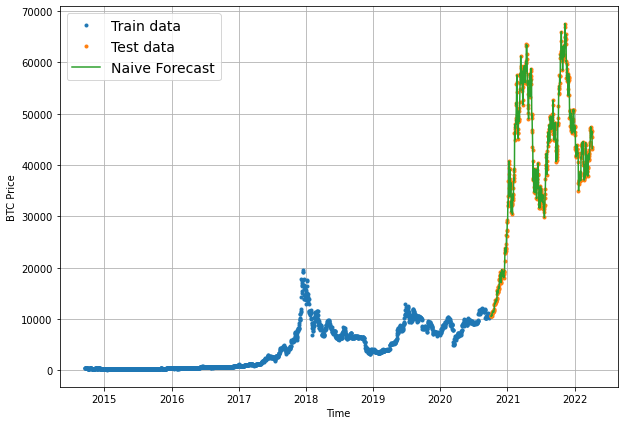

In [ ]:
# plot the naive forecast
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_train,values=y_train,label="Train data")
plot_time_series(timesteps=X_test,values=y_test,label="Test data")
plot_time_series(timesteps=X_test[1:],values=naive_forecast,format="-",label="Naive Forecast")

## Evaluating time series model

Common regression metrics which can also be used for time series forecasing:

* MAE - mean absolute error
* MSE - mean squared KeyError
* RMSE - root mean squared error
* MAPE/sMAPE - (symmetric) mean absolute percentage error
* MASE - mean absolute scaled error 

In [ ]:
import tensorflow as tf

In [ ]:
# MASE implementation

def mean_absolute_scaled_error(y_true,y_pred):
  """
  Implement MASE (assuming no seasonality of data)
  """
  mae=tf.reduce_mean(tf.abs(y_true-y_pred))

  # MAE of naive forecast (no seasonality)
  mae_naive_no_season=tf.reduce_mean(tf.abs(y_true[1:]-y_true[:-1])) # seasonality is 1 day

  return mae/mae_naive_no_season


In [ ]:
mean_absolute_scaled_error(y_true=y_test[1:],y_pred=naive_forecast).numpy()

0.9983691342758547

In [ ]:
# create a function to take in model predictions and truth values and return evaluation metrics

def evaluate_preds(y_true,y_pred):

  # make sure float32 datatypes (for metric calculations)
  y_true=tf.cast(y_true,dtype=tf.float32)
  y_pred=tf.cast(y_pred,dtype=tf.float32)

  # calculate various evaluation metrics
  mae=tf.keras.metrics.mean_absolute_error(y_true,y_pred)
  mse=tf.keras.metrics.mean_squared_error(y_true,y_pred)
  rmse=tf.sqrt(mse)
  mape=tf.keras.metrics.mean_absolute_percentage_error(y_true,y_pred)
  mase=mean_absolute_scaled_error(y_true,y_pred)

  return {"mae":mae.numpy(),
          "mse":mse.numpy(),
          "rmse":rmse.numpy(),
          "mape":mape.numpy(),
          "mase":mase.numpy()} 



In [ ]:
naive_results=evaluate_preds(y_true=y_test[1:],y_pred=naive_forecast)

naive_results

{'mae': 1184.0837,
 'mape': 2.8548772,
 'mase': 0.99836904,
 'mse': 2807027.2,
 'rmse': 1675.4185}

## Windowing the dataset

In [ ]:
len(y_train)

2208

In [ ]:
print(f"we want to use: {btc_price[:7]} to predict this: {btc_price[7]}")

we want to use: [457.334015, 424.440002, 394.79599, 408.903992, 398.821014, 402.152008, 435.790985] to predict this: 423.204987


In [ ]:
# global variables for window and horizon size
HORIZON=1 # predict next one day
WINDOW=7 # use the past week of Bitcoin data to make the prediction

In [ ]:
# create function to label windowed data

def get_labelled_window(x,horizon=HORIZON):
  """
  create labels for windowed dataset

  E.g. if horizon=1
  Input: [0,1,2,3,4,5,6,7] -> Output: ([0,1,2,3,4,5,6],[7])
  """
  return  x[:,:-horizon],x[:,-horizon:]

In [ ]:
# test out the window labelling function

test_window, test_label = get_labelled_window(tf.expand_dims(tf.range(8),axis=0))

print(f"window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

window: [0 1 2 3 4 5 6] -> Label: 7


In [ ]:
# create function to view numpy arrays as windows
import numpy as np
def make_windows(x,window_size=WINDOW,horizon=HORIZON):
  """
  Turns a 1D array into a 2D array of sequential labelled windows of window_size
  with horizon size labels
  """

  # create a window of specific window_size (add the horizon on the end for labelling later)

  window_step=np.expand_dims(np.arange(window_size+horizon),axis=0)

  # create a 2d array of multiple window steps

  window_indexes=window_step +np.expand_dims(np.arange(len(x)-(window_size+horizon-1)),axis=0).T # create 2D array of windows of size window_size

  #print(f"window indexes:\n {window_indexes,window_indexes.shape}")

  # index on the target array (time series) with 2D array of multiple window steps

  windowed_array=x[window_indexes]

  #print(windowed_array)

  # Get the labelled windows

  windows, labels = get_labelled_window(windowed_array,horizon=horizon)

  return windows,labels 





In [ ]:
full_windows,full_labels=make_windows(prices,window_size=WINDOW,horizon=HORIZON)
len(full_windows), len(full_labels)

(2753, 2753)

In [ ]:
len(prices)

2760

In [ ]:
for i in range(5):
  print(f"window: {full_windows[i]} -> Label: {full_labels[i]}")

window: [457.334015 424.440002 394.79599  408.903992 398.821014 402.152008
 435.790985] -> Label: [423.204987]
window: [424.440002 394.79599  408.903992 398.821014 402.152008 435.790985
 423.204987] -> Label: [411.574005]
window: [394.79599  408.903992 398.821014 402.152008 435.790985 423.204987
 411.574005] -> Label: [404.424988]
window: [408.903992 398.821014 402.152008 435.790985 423.204987 411.574005
 404.424988] -> Label: [399.519989]
window: [398.821014 402.152008 435.790985 423.204987 411.574005 404.424988
 399.519989] -> Label: [377.181]


In [ ]:
for i in range(5):
  print(f"window: {full_windows[i-5]} -> Label: {full_labels[i-5]}")

window: [46820.492188 47128.003906 47465.730469 47062.664063 45538.675781
 46281.644531 45868.949219] -> Label: [46453.566406]
window: [47128.003906 47465.730469 47062.664063 45538.675781 46281.644531
 45868.949219 46453.566406] -> Label: [46622.675781]
window: [47465.730469 47062.664063 45538.675781 46281.644531 45868.949219
 46453.566406 46622.675781] -> Label: [45555.992188]
window: [47062.664063 45538.675781 46281.644531 45868.949219 46453.566406
 46622.675781 45555.992188] -> Label: [43206.738281]
window: [45538.675781 46281.644531 45868.949219 46453.566406 46622.675781
 45555.992188 43206.738281] -> Label: [43503.847656]


In [ ]:
prices[-1]

43503.847656

## Turning windows into training and test sets

In [ ]:
# make the train and test splits

def make_train_test_splits(windows,labels,test_split=0.2):

  """
  splits matching pairs of windows and labels into train and test splits
  """
  split_size=int(len(windows)*(1-test_split))
  train_windows=windows[:split_size]
  train_labels=labels[:split_size]

  test_windows=windows[split_size:]
  test_labels=labels[split_size:]

  return train_windows,test_windows,train_labels,test_labels


In [ ]:
# create train and test windows

train_windows,test_windows,train_labels,test_labels=make_train_test_splits(full_windows,full_labels)

len(train_windows),len(test_windows),len(train_labels),len(test_labels)

(2202, 551, 2202, 551)

In [ ]:
train_windows[:5], train_labels[:5]

(array([[457.334015, 424.440002, 394.79599 , 408.903992, 398.821014,
         402.152008, 435.790985],
        [424.440002, 394.79599 , 408.903992, 398.821014, 402.152008,
         435.790985, 423.204987],
        [394.79599 , 408.903992, 398.821014, 402.152008, 435.790985,
         423.204987, 411.574005],
        [408.903992, 398.821014, 402.152008, 435.790985, 423.204987,
         411.574005, 404.424988],
        [398.821014, 402.152008, 435.790985, 423.204987, 411.574005,
         404.424988, 399.519989]]), array([[423.204987],
        [411.574005],
        [404.424988],
        [399.519989],
        [377.181   ]]))

In [ ]:
test_windows[:5], test_labels[:5]

(array([[10775.269531, 10709.652344, 10844.640625, 10784.491211,
         10619.452148, 10575.974609, 10549.329102],
        [10709.652344, 10844.640625, 10784.491211, 10619.452148,
         10575.974609, 10549.329102, 10669.583008],
        [10844.640625, 10784.491211, 10619.452148, 10575.974609,
         10549.329102, 10669.583008, 10793.339844],
        [10784.491211, 10619.452148, 10575.974609, 10549.329102,
         10669.583008, 10793.339844, 10604.40625 ],
        [10619.452148, 10575.974609, 10549.329102, 10669.583008,
         10793.339844, 10604.40625 , 10668.96875 ]]), array([[10669.583008],
        [10793.339844],
        [10604.40625 ],
        [10668.96875 ],
        [10915.685547]]))

In [ ]:
# Check if train labels are the same (before and after window split)
np.array_equal(np.squeeze(train_labels[:-HORIZON]), y_train[WINDOW:])

True

## Make a modelling checkpoint

In [ ]:
import os 

# create a function to implement a ModelCheckpoint callback with a specific filename

def create_model_checkpoint(model_name,save_path="model_experiments"):
  
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path,model_name),
                                            verbose=0,monitor="val_loss",
                                            save_best_only=True)


## Model 1: Dense model (window=7,horizon=1)

* A single dense layer with 128 hidden units and ReLu
* An output layer with linear activation( no activation)
* Adam optimization and MAE loss function
* Batch size of 128
* 100 epochs

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

tf.random.set_seed(42)

# create model
model_1=tf.keras.Sequential([
                  layers.Dense(128,activation="relu"),
                  layers.Dense(HORIZON,activation="linear"),
],name="model_1_dense")

# compile the model
model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae","mse"])

# fit the model

history_model_1=model_1.fit(x=train_windows,y=train_labels,
                      epochs=100,verbose=1,batch_size=128,
                      validation_data=(test_windows,test_labels),
                      callbacks=[create_model_checkpoint(model_name=model_1.name)])


Epoch 1/100
18/18 [==============================] - 3s 39ms/step - loss: 1069.7163 - mae: 1069.7163 - mse: 3309438.2500 - val_loss: 4971.6958 - val_mae: 4971.6958 - val_mse: 35651612.0000
Epoch 2/100
18/18 [==============================] - 0s 26ms/step - loss: 314.7111 - mae: 314.7111 - mse: 321301.7188 - val_loss: 2168.0740 - val_mae: 2168.0740 - val_mse: 8535831.0000
Epoch 3/100
18/18 [==============================] - 0s 25ms/step - loss: 232.2312 - mae: 232.2312 - mse: 214164.6562 - val_loss: 1955.8632 - val_mae: 1955.8632 - val_mse: 6712292.5000
Epoch 4/100
18/18 [==============================] - 0s 25ms/step - loss: 214.8714 - mae: 214.8714 - mse: 196029.6094 - val_loss: 1913.6210 - val_mae: 1913.6210 - val_mse: 6212281.5000
Epoch 5/100
18/18 [==============================] - 0s 26ms/step - loss: 206.7687 - mae: 206.7687 - mse: 182342.5469 - val_loss: 1822.0756 - val_mae: 1822.0756 - val_mse: 5901785.0000
Epoch 6/100
18/18 [==============================] - 0s 25ms/step - los

In [ ]:
# evaluate model_1 on test data
model_1.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1210.8955 - mae: 1210.8955 - mse: 2919769.5000


[1210.8955078125, 1210.8955078125, 2919769.5]

In [ ]:
# load in saved best performing model_1 and evaluate it on test data
model_1=tf.keras.models.load_model("model_experiments/model_1_dense/")

model_1.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1200.7169 - mae: 1200.7169 - mse: 2871866.0000


[1200.7169189453125, 1200.7169189453125, 2871866.0]

## Making forecast with a model on test dataset



In [ ]:
def make_preds(model,input_data):

  """
  uses models to make predictions in input_data
  """
  forecast=model.predict(input_data)
  
  return tf.squeeze(forecast) # return 1D array of predictions

In [ ]:
# make predictions using model_1 on test dataset and view results

model_1_preds= make_preds(model_1,test_windows)
len(model_1_preds),model_1_preds[:10]

(551, <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([10557.337, 10649.015, 10774.493, 10645.013, 10653.322, 10883.152,
        11064.62 , 11267.586, 11391.567, 11552.817], dtype=float32)>)

In [ ]:
# Evaluate preds
model_1_results=evaluate_preds(y_true=tf.squeeze(test_labels),y_pred=model_1_preds)
model_1_results

{'mae': 1200.7169,
 'mape': 2.902458,
 'mase': 1.0123935,
 'mse': 2871865.5,
 'rmse': 1694.658}

In [ ]:
naive_results

{'mae': 1184.0837,
 'mape': 2.8548772,
 'mase': 0.99836904,
 'mse': 2807027.2,
 'rmse': 1675.4185}

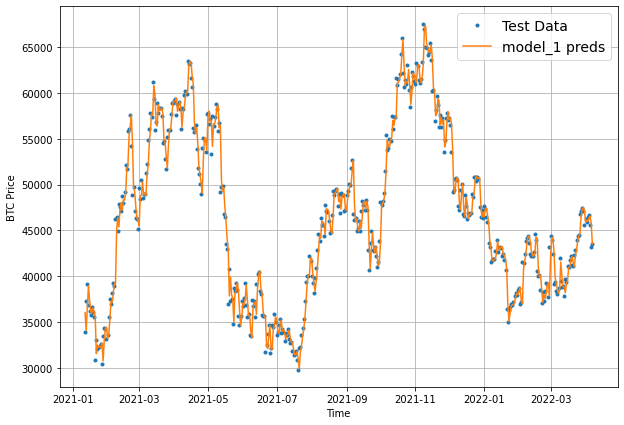

In [ ]:
# plot the model_1 predictions
offset=100

plt.figure(figsize=(10,7))

plot_time_series(timesteps=X_test[-len(test_windows):],values=test_labels[:,0],
                 start=offset,label="Test Data")

plot_time_series(timesteps=X_test[-len(test_windows):],values=model_1_preds,
                 start=offset,format="-",label="model_1 preds")


## Model 2: Dense (window=30,horizon=1)

In [ ]:
HORIZON=1
WINDOW=30

In [ ]:
# make windowed data with appropriate horizon and window sizes
full_windows,full_labels=make_windows(prices,window_size=WINDOW,horizon=HORIZON)
len(full_windows),len(full_labels)

(2730, 2730)

In [ ]:
# make train and test windows

train_windows,test_windows,train_labels,test_labels=make_train_test_splits(
    windows=full_windows,
    labels=full_labels,
    test_split=0.2
)

len(train_windows),len(test_windows),len(train_labels),len(test_labels)

(2184, 546, 2184, 546)

In [ ]:
train_windows[:5],train_labels[:5]

(array([[457.334015, 424.440002, 394.79599 , 408.903992, 398.821014,
         402.152008, 435.790985, 423.204987, 411.574005, 404.424988,
         399.519989, 377.181   , 375.46701 , 386.944   , 383.61499 ,
         375.071991, 359.511993, 328.865997, 320.51001 , 330.07901 ,
         336.187012, 352.940002, 365.026001, 361.562012, 362.299011,
         378.549011, 390.414001, 400.869995, 394.77301 , 382.556   ],
        [424.440002, 394.79599 , 408.903992, 398.821014, 402.152008,
         435.790985, 423.204987, 411.574005, 404.424988, 399.519989,
         377.181   , 375.46701 , 386.944   , 383.61499 , 375.071991,
         359.511993, 328.865997, 320.51001 , 330.07901 , 336.187012,
         352.940002, 365.026001, 361.562012, 362.299011, 378.549011,
         390.414001, 400.869995, 394.77301 , 382.556   , 383.757996],
        [394.79599 , 408.903992, 398.821014, 402.152008, 435.790985,
         423.204987, 411.574005, 404.424988, 399.519989, 377.181   ,
         375.46701 , 386.944   ,

In [ ]:
tf.random.set_seed(42)

# create model

model_2=tf.keras.Sequential([
                  layers.Dense(128,activation=tf.keras.activations.relu),
                  layers.Dense(HORIZON)
],name="model_2_dense")

# compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae","mse"])

# fit the model

history_model_2=model_2.fit(train_windows,
                    train_labels,
                    epochs=100,
                    batch_size=128,
                    verbose=1,
                    validation_data=(test_windows,test_labels),
                    callbacks=[create_model_checkpoint(model_name=model_2.name)])


Epoch 1/100
18/18 [==============================] - 1s 32ms/step - loss: 1429.8413 - mae: 1429.8413 - mse: 6413278.5000 - val_loss: 4896.4155 - val_mae: 4896.4155 - val_mse: 38574148.0000
Epoch 2/100
18/18 [==============================] - 0s 25ms/step - loss: 524.7073 - mae: 524.7073 - mse: 969341.0625 - val_loss: 3512.8711 - val_mae: 3512.8711 - val_mse: 20137938.0000
Epoch 3/100
18/18 [==============================] - 0s 26ms/step - loss: 353.9954 - mae: 353.9954 - mse: 488132.9062 - val_loss: 2792.3733 - val_mae: 2792.3733 - val_mse: 12903634.0000
Epoch 4/100
18/18 [==============================] - 0s 25ms/step - loss: 285.2460 - mae: 285.2460 - mse: 319424.3750 - val_loss: 2325.1816 - val_mae: 2325.1816 - val_mse: 9328142.0000
Epoch 5/100
18/18 [==============================] - 0s 4ms/step - loss: 250.8741 - mae: 250.8741 - mse: 245529.9844 - val_loss: 2348.0845 - val_mae: 2348.0845 - val_mse: 9620702.0000
Epoch 6/100
18/18 [==============================] - 0s 4ms/step - los

In [ ]:
# Evaluate model_2 on test data
model_2.evaluate(test_windows,test_labels)


18/18 [==============================] - 0s 2ms/step - loss: 1710.0194 - mae: 1710.0194 - mse: 5100762.0000


[1710.0194091796875, 1710.0194091796875, 5100762.0]

In [ ]:
# load in the best performing model
model_2=tf.keras.models.load_model("model_experiments/model_2_dense/")
model_2.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1348.1567 - mae: 1348.1567 - mse: 3398971.2500


[1348.15673828125, 1348.15673828125, 3398971.25]

In [ ]:
# get the forecast predictions
model_2_preds=make_preds(model_2,
                         input_data=test_windows)

In [ ]:
# evaluate results for model_2 predictions
model_2_results=evaluate_preds(y_true=tf.squeeze(test_labels),y_pred=model_2_preds)
model_2_results

{'mae': 1348.1567,
 'mape': 3.251505,
 'mase': 1.1277107,
 'mse': 3398971.2,
 'rmse': 1843.6299}

In [ ]:
model_1_results

{'mae': 1200.7169,
 'mape': 2.902458,
 'mase': 1.0123935,
 'mse': 2871865.5,
 'rmse': 1694.658}

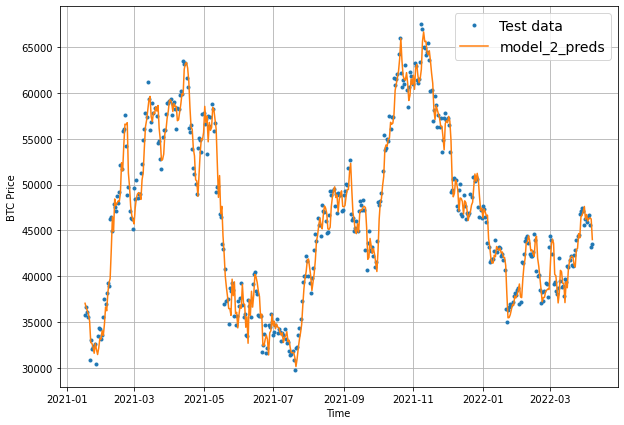

In [ ]:
offset=100
plt.figure(figsize=(10,7))

plot_time_series(timesteps=X_test[-len(test_windows):],values=test_labels[:,0],
                 start=offset,label="Test data")

plot_time_series(timesteps=X_test[-len(test_windows):],values=model_2_preds,
                 start=offset,format="-",label="model_2_preds")


## Model 3: (window=30,horizon=7)


In [ ]:
HORIZON=7
WINDOW=30

full_windows,full_labels=make_windows(prices,window_size=WINDOW,horizon=HORIZON)

len(full_windows),len(full_labels)

(2724, 2724)

In [ ]:
train_windows,test_windows,train_labels,test_labels = make_train_test_splits(windows=full_windows,
                                                                             labels=full_labels)
                                                                          
len(train_windows), len(test_windows),len(train_labels),len(test_labels)

(2179, 545, 2179, 545)

In [ ]:
tf.random.set_seed(42)

# create the model

model_3=tf.keras.Sequential([
              layers.Dense(128,activation="relu"),
              layers.Dense(HORIZON)
],name="model_3_dense")


# compile the model

model_3.compile(loss="mae",optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae","mse"])

# fit the model

model_3.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=1,
            validation_data=(test_windows,test_labels),
            callbacks=[create_model_checkpoint(model_name=model_3.name,)])



Epoch 1/100
18/18 [==============================] - 1s 46ms/step - loss: 1970.1779 - mae: 1970.1779 - mse: 14496084.0000 - val_loss: 7475.0449 - val_mae: 7475.0449 - val_mse: 100156848.0000
Epoch 2/100
18/18 [==============================] - 0s 25ms/step - loss: 751.9844 - mae: 751.9844 - mse: 1913260.8750 - val_loss: 5406.0449 - val_mae: 5406.0449 - val_mse: 49108248.0000
Epoch 3/100
18/18 [==============================] - 0s 26ms/step - loss: 575.3461 - mae: 575.3461 - mse: 1221856.3750 - val_loss: 4619.8599 - val_mae: 4619.8599 - val_mse: 36069732.0000
Epoch 4/100
18/18 [==============================] - 0s 5ms/step - loss: 515.4903 - mae: 515.4903 - mse: 1027107.5000 - val_loss: 4672.0566 - val_mae: 4672.0566 - val_mse: 36551500.0000
Epoch 5/100
18/18 [==============================] - 0s 26ms/step - loss: 518.1827 - mae: 518.1827 - mse: 971991.0000 - val_loss: 4172.9658 - val_mae: 4172.9658 - val_mse: 29955032.0000
Epoch 6/100
18/18 [==============================] - 0s 25ms/st

In [ ]:
# evaluate the model_3 on test data

model_3.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 7ms/step - loss: 2783.1479 - mae: 2783.1479 - mse: 13616497.0000


[2783.14794921875, 2783.14794921875, 13616497.0]

In [ ]:
# load best version of model_3 

model_3=tf.keras.models.load_model("model_experiments/model_3_dense/") 
model_3.evaluate(test_windows,test_labels)

18/18 [==============================] - 1s 7ms/step - loss: 2648.1836 - mae: 2648.1836 - mse: 13096378.0000


[2648.18359375, 2648.18359375, 13096378.0]

In [ ]:
# make predictions with model_3
model_3_preds=make_preds(model_3,input_data=test_windows)

model_3_preds[:5]

<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[10671.897 , 10528.875 , 10626.2295, 10624.28  , 10469.418 ,
        10771.208 , 10805.795 ],
       [10674.251 , 10511.907 , 10590.82  , 10842.652 , 10523.246 ,
        10786.865 , 10857.969 ],
       [10724.877 , 10511.893 , 10605.445 , 10790.121 , 10603.276 ,
        10868.868 , 10828.164 ],
       [10624.048 , 10409.903 , 10510.351 , 10743.959 , 10469.218 ,
        10775.774 , 10724.045 ],
       [10648.487 , 10512.673 , 10571.32  , 10714.365 , 10640.876 ,
        10761.666 , 10824.57  ]], dtype=float32)>

In [ ]:
model_2_preds[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([10882.783, 10880.709, 11199.588, 11273.856, 11518.985],
      dtype=float32)>

## Make evaluation function for larger horizons

In [ ]:
# create a function to take in model predictions and truth values and return evaluation metrics

def evaluate_preds(y_true,y_pred):

  # make sure float32 datatypes (for metric calculations)
  y_true=tf.cast(y_true,dtype=tf.float32)
  y_pred=tf.cast(y_pred,dtype=tf.float32)

  # calculate various evaluation metrics
  mae=tf.keras.metrics.mean_absolute_error(y_true,y_pred)
  mse=tf.keras.metrics.mean_squared_error(y_true,y_pred)
  rmse=tf.sqrt(mse)
  mape=tf.keras.metrics.mean_absolute_percentage_error(y_true,y_pred)
  mase=mean_absolute_scaled_error(y_true,y_pred)

  # account for different sized metrics (for long horizons, 
  # we want to reduce metrics to a single value)

  if mae.ndim>0:
    mae=tf.reduce_mean(mae)
    mse=tf.reduce_mean(mse)
    rmse=tf.reduce_mean(rmse)
    mape=tf.reduce_mean(mape)
    mase=tf.reduce_mean(mase)

  return {"mae":mae.numpy(),
          "mse":mse.numpy(),
          "rmse":rmse.numpy(),
          "mape":mape.numpy(),
          "mase":mase.numpy()} 


In [ ]:
tf.squeeze(test_labels).shape,model_3_preds.shape

(TensorShape([545, 7]), TensorShape([545, 7]))

In [ ]:
# model_3 results

model_3_results=evaluate_preds(y_true=tf.squeeze(test_labels),
                               y_pred=model_3_preds)

model_3_results

{'mae': 2648.1833,
 'mape': 6.3980584,
 'mase': 2.2197073,
 'mse': 13096378.0,
 'rmse': 3027.9968}

In [ ]:
model_2_results

{'mae': 1348.1567,
 'mape': 3.251505,
 'mase': 1.1277107,
 'mse': 3398971.2,
 'rmse': 1843.6299}

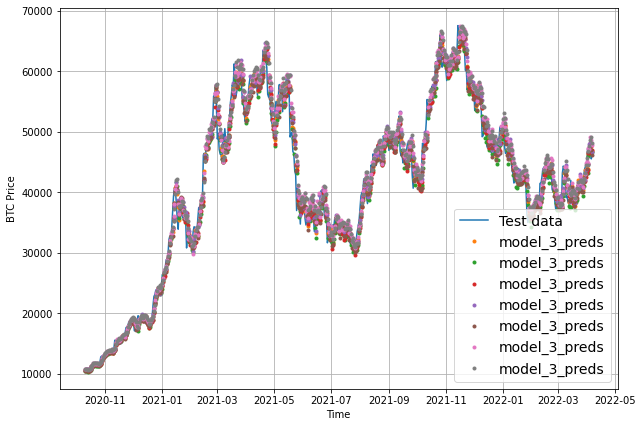

In [ ]:
offset=0
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_test[-len(test_windows):],values=test_labels[:,0],
                 start=offset,format="-",label="Test data")
plot_time_series(timesteps=X_test[-len(test_windows):],values=model_3_preds,
                 start=offset,format=".",label="model_3_preds")


In [ ]:
model_3_preds[:5]

<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[10671.897 , 10528.875 , 10626.2295, 10624.28  , 10469.418 ,
        10771.208 , 10805.795 ],
       [10674.251 , 10511.907 , 10590.82  , 10842.652 , 10523.246 ,
        10786.865 , 10857.969 ],
       [10724.877 , 10511.893 , 10605.445 , 10790.121 , 10603.276 ,
        10868.868 , 10828.164 ],
       [10624.048 , 10409.903 , 10510.351 , 10743.959 , 10469.218 ,
        10775.774 , 10724.045 ],
       [10648.487 , 10512.673 , 10571.32  , 10714.365 , 10640.876 ,
        10761.666 , 10824.57  ]], dtype=float32)>

In [ ]:
tf.reduce_mean(model_3_preds[:5],axis=1)

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([10642.529, 10683.959, 10704.663, 10608.186, 10667.708],
      dtype=float32)>

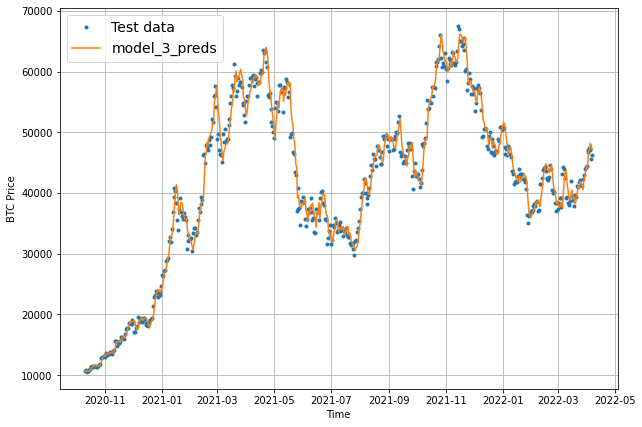

In [ ]:
offset=0
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_test[-len(test_windows):],values=test_labels[:,0],
                 start=offset,format=".",label="Test data")
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=tf.reduce_mean(model_3_preds,axis=1),
                 start=offset,format="-",label="model_3_preds")


## Comparing the models

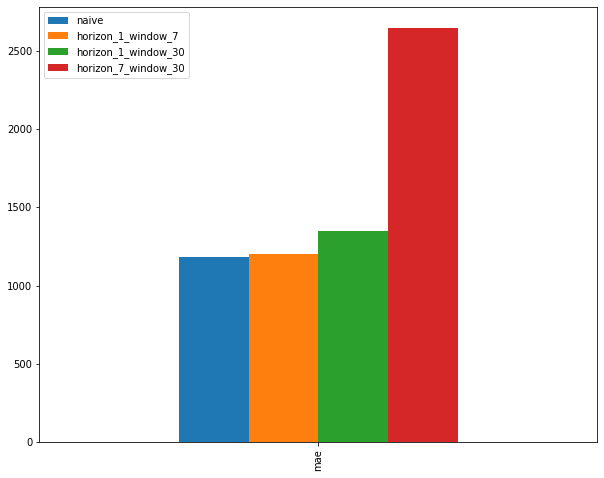

In [ ]:
pd.DataFrame({"naive":naive_results["mae"],
  "horizon_1_window_7":model_1_results["mae"],
  "horizon_1_window_30":model_2_results["mae"],
  "horizon_7_window_30":model_3_results["mae"]}, index=["mae"]).plot(figsize=(10,8),
                                                                    kind="bar")
  


## Model 4: Conv1D

In [ ]:
HORIZON=1
WINDOW=7

In [ ]:
# create windowed data

full_windows,full_labels=make_windows(prices,window_size=WINDOW,horizon=HORIZON)
len(full_windows), len(full_labels)


(2753, 2753)

In [ ]:
# create train and test sets

train_windows,test_windows,train_labels,test_labels=make_train_test_splits(full_windows,
                                                                           full_labels)

len(train_windows),len(test_windows),len(train_labels),len(test_labels)

(2202, 551, 2202, 551)

To use Conv1D layer, we need an input shape of: `(batch_size,timesteps,input_dim)`

In [ ]:
# check data input shape
train_windows[0].shape

(7,)

In [ ]:
# before we pass it to the Conv1D layer,we have to reshape it

x=tf.constant(train_windows[0])
x


<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([457.334015, 424.440002, 394.79599 , 408.903992, 398.821014,
       402.152008, 435.790985])>

In [ ]:

expand_dims_layer=layers.Lambda(lambda x:tf.expand_dims(x,axis=1)) # add extra dimension for input_dim


In [ ]:
# test out lambda layer

print(f"original shape: {x.shape}")

print(f"expanded shape: {expand_dims_layer(x).shape}")

print(f"original values with expanded shape:\n {expand_dims_layer(x)}")


original shape: (7,)
expanded shape: (7, 1)
original values with expanded shape:
 [[457.334]
 [424.44 ]
 [394.796]
 [408.904]
 [398.821]
 [402.152]
 [435.791]]


In [ ]:
tf.random.set_seed(42)

# create Conv1D model

model_4=tf.keras.Sequential([
      layers.Lambda(lambda x: tf.expand_dims(x,axis=1)),
      layers.Conv1D(filters=128,kernel_size=4,strides=1,padding="causal",
                    activation="relu"),
      layers.Dense(HORIZON)
],name="model_4_conv1D")


# compile the model

model_4.compile(loss="mae",optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae","mse"])

# fit the model

model_4.fit(train_windows,train_labels,batch_size=128,epochs=100,
            verbose=1,validation_data=(test_windows,test_labels),
            callbacks=[create_model_checkpoint(model_name=model_4.name)])


Epoch 1/100
18/18 [==============================] - 14s 120ms/step - loss: 2561.1555 - mae: 2561.1555 - mse: 15212218.0000 - val_loss: 2028.7582 - val_mae: 2028.7582 - val_mse: 7217558.5000
Epoch 2/100
18/18 [==============================] - 0s 12ms/step - loss: 471.7913 - mae: 471.7913 - mse: 667854.9375 - val_loss: 3436.1956 - val_mae: 3436.1956 - val_mse: 17345760.0000
Epoch 3/100
18/18 [==============================] - 0s 10ms/step - loss: 295.1606 - mae: 295.1606 - mse: 311505.6562 - val_loss: 2161.6909 - val_mae: 2161.6909 - val_mse: 7813865.0000
Epoch 4/100
18/18 [==============================] - 0s 7ms/step - loss: 250.0786 - mae: 250.0786 - mse: 245407.7969 - val_loss: 2111.8997 - val_mae: 2111.8997 - val_mse: 7528634.0000
Epoch 5/100
18/18 [==============================] - 0s 8ms/step - loss: 229.7666 - mae: 229.7666 - mse: 218498.4844 - val_loss: 2072.8733 - val_mae: 2072.8733 - val_mse: 7303542.5000
Epoch 6/100
18/18 [==============================] - 1s 85ms/step - lo

In [ ]:
model_4.summary()

Model: "model_4_conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            3712      
                                                                 
 dense_6 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 3,841
Trainable params: 3,841
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_2.summary()

Model: "model_2_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 128)               3968      
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 4,097
Trainable params: 4,097
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# evalaute model
model_4.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 1319.9980 - mae: 1319.9980 - mse: 3201700.7500


[1319.998046875, 1319.998046875, 3201700.75]

In [ ]:
# load the best performing model and evaluate

model_4=tf.keras.models.load_model("model_experiments/model_4_conv1D")

model_4.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 5ms/step - loss: 1231.4214 - mae: 1231.4214 - mse: 2982096.5000


[1231.42138671875, 1231.42138671875, 2982096.5]

In [ ]:
# make predictions

model_4_preds=make_preds(model_4,test_windows)
model_4_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([10591.906 , 10675.164 , 10807.019 , 10695.828 , 10681.385 ,
       10901.901 , 11081.297 , 11289.8545, 11421.342 , 11564.827 ],
      dtype=float32)>

In [ ]:
# evaluate predictions

model_4_results=evaluate_preds(y_true=tf.squeeze(test_labels),
                               y_pred=model_4_preds)

model_4_results

{'mae': 1231.4214,
 'mape': 2.9733121,
 'mase': 1.0382822,
 'mse': 2982096.5,
 'rmse': 1726.8748}

In [ ]:
model_1_results

{'mae': 1200.7169,
 'mape': 2.902458,
 'mase': 1.0123935,
 'mse': 2871865.5,
 'rmse': 1694.658}

## Model 5: RNN (LSTM)

In [ ]:
tf.random.set_seed(42)

# build LSTM with functional API

inputs=layers.Input(shape=(WINDOW))

x=layers.Lambda(lambda x:tf.expand_dims(x,axis=1))(inputs)

x=layers.LSTM( 128,activation="relu")(x)

#x=layers.Dense(32,activation="relu")(x)

output=layers.Dense(HORIZON)(x)

model_5=tf.keras.Model(inputs=inputs,outputs=output,name="model_5_LSTM")

# Compile tht model

model_5.compile(loss="mae",optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# fit the model

model_5.fit(train_windows,
            train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows,test_labels),
            callbacks=[create_model_checkpoint(model_name=model_5.name)])


Epoch 1/100
18/18 [==============================] - ETA: 0s - loss: 3318.3599 - mae: 3318.3599INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 6s 175ms/step - loss: 3318.3599 - mae: 3318.3599 - val_loss: 20555.2051 - val_mae: 20555.2051
Epoch 2/100
11/18 [=================>............] - ETA: 0s - loss: 1596.2019 - mae: 1596.2019INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 111ms/step - loss: 1217.6373 - mae: 1217.6373 - val_loss: 2003.5776 - val_mae: 2003.5776
Epoch 3/100
18/18 [==============================] - 0s 7ms/step - loss: 306.1705 - mae: 306.1705 - val_loss: 2339.9524 - val_mae: 2339.9524
Epoch 4/100
18/18 [==============================] - 0s 7ms/step - loss: 249.8979 - mae: 249.8979 - val_loss: 2012.3533 - val_mae: 2012.3533
Epoch 5/100
12/18 [===================>..........] - ETA: 0s - loss: 225.9191 - mae: 225.9191INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 96ms/step - loss: 219.9193 - mae: 219.9193 - val_loss: 1975.1649 - val_mae: 1975.1649
Epoch 6/100
11/18 [=================>............] - ETA: 0s - loss: 215.7947 - mae: 215.7947INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 99ms/step - loss: 218.7461 - mae: 218.7461 - val_loss: 1963.1372 - val_mae: 1963.1372
Epoch 7/100
12/18 [===================>..........] - ETA: 0s - loss: 219.6371 - mae: 219.6371INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 97ms/step - loss: 218.3203 - mae: 218.3203 - val_loss: 1949.9144 - val_mae: 1949.9144
Epoch 8/100
10/18 [===============>..............] - ETA: 0s - loss: 215.1039 - mae: 215.1039INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 120ms/step - loss: 215.2378 - mae: 215.2378 - val_loss: 1931.7736 - val_mae: 1931.7736
Epoch 9/100
18/18 [==============================] - 0s 7ms/step - loss: 212.5759 - mae: 212.5759 - val_loss: 1962.1071 - val_mae: 1962.1071
Epoch 10/100
11/18 [=================>............] - ETA: 0s - loss: 212.7958 - mae: 212.7958INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 97ms/step - loss: 210.9888 - mae: 210.9888 - val_loss: 1905.3391 - val_mae: 1905.3391
Epoch 11/100
10/18 [===============>..............] - ETA: 0s - loss: 211.9326 - mae: 211.9326INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 96ms/step - loss: 211.1805 - mae: 211.1805 - val_loss: 1894.9772 - val_mae: 1894.9772
Epoch 12/100
11/18 [=================>............] - ETA: 0s - loss: 211.2753 - mae: 211.2753INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 114ms/step - loss: 209.2156 - mae: 209.2156 - val_loss: 1887.9716 - val_mae: 1887.9716
Epoch 13/100
11/18 [=================>............] - ETA: 0s - loss: 196.1722 - mae: 196.1722INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 98ms/step - loss: 205.8813 - mae: 205.8813 - val_loss: 1871.0125 - val_mae: 1871.0125
Epoch 14/100
17/18 [===========================>..] - ETA: 0s - loss: 203.9372 - mae: 203.9372INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 101ms/step - loss: 204.3503 - mae: 204.3503 - val_loss: 1848.3197 - val_mae: 1848.3197
Epoch 15/100
12/18 [===================>..........] - ETA: 0s - loss: 190.7303 - mae: 190.7303INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 97ms/step - loss: 204.5006 - mae: 204.5006 - val_loss: 1830.7419 - val_mae: 1830.7419
Epoch 16/100
12/18 [===================>..........] - ETA: 0s - loss: 193.5436 - mae: 193.5436INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 116ms/step - loss: 202.0529 - mae: 202.0529 - val_loss: 1818.7140 - val_mae: 1818.7140
Epoch 17/100
12/18 [===================>..........] - ETA: 0s - loss: 192.6907 - mae: 192.6907INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 97ms/step - loss: 198.0204 - mae: 198.0204 - val_loss: 1814.6844 - val_mae: 1814.6844
Epoch 18/100
11/18 [=================>............] - ETA: 0s - loss: 197.8810 - mae: 197.8810INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 97ms/step - loss: 200.2607 - mae: 200.2607 - val_loss: 1783.5182 - val_mae: 1783.5182
Epoch 19/100
12/18 [===================>..........] - ETA: 0s - loss: 195.8089 - mae: 195.8089INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 97ms/step - loss: 196.7683 - mae: 196.7683 - val_loss: 1772.1580 - val_mae: 1772.1580
Epoch 20/100
18/18 [==============================] - 0s 6ms/step - loss: 193.0456 - mae: 193.0456 - val_loss: 1790.3076 - val_mae: 1790.3076
Epoch 21/100
12/18 [===================>..........] - ETA: 0s - loss: 195.2584 - mae: 195.2584INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 115ms/step - loss: 192.0197 - mae: 192.0197 - val_loss: 1757.1027 - val_mae: 1757.1027
Epoch 22/100
12/18 [===================>..........] - ETA: 0s - loss: 184.9884 - mae: 184.9884INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 139ms/step - loss: 193.2735 - mae: 193.2735 - val_loss: 1720.6801 - val_mae: 1720.6801
Epoch 23/100
12/18 [===================>..........] - ETA: 0s - loss: 192.2661 - mae: 192.2661INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 97ms/step - loss: 189.0530 - mae: 189.0530 - val_loss: 1706.3386 - val_mae: 1706.3386
Epoch 24/100
18/18 [==============================] - 0s 6ms/step - loss: 184.4528 - mae: 184.4528 - val_loss: 1719.2748 - val_mae: 1719.2748
Epoch 25/100
11/18 [=================>............] - ETA: 0s - loss: 185.2023 - mae: 185.2023INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 97ms/step - loss: 187.1104 - mae: 187.1104 - val_loss: 1665.1403 - val_mae: 1665.1403
Epoch 26/100
11/18 [=================>............] - ETA: 0s - loss: 179.0476 - mae: 179.0476INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 119ms/step - loss: 181.9205 - mae: 181.9205 - val_loss: 1648.2446 - val_mae: 1648.2446
Epoch 27/100
12/18 [===================>..........] - ETA: 0s - loss: 170.2297 - mae: 170.2297INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 97ms/step - loss: 179.7494 - mae: 179.7494 - val_loss: 1633.3500 - val_mae: 1633.3500
Epoch 28/100
18/18 [==============================] - 0s 7ms/step - loss: 177.6965 - mae: 177.6965 - val_loss: 1686.1388 - val_mae: 1686.1388
Epoch 29/100
11/18 [=================>............] - ETA: 0s - loss: 175.5085 - mae: 175.5085INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 101ms/step - loss: 176.9258 - mae: 176.9258 - val_loss: 1618.2227 - val_mae: 1618.2227
Epoch 30/100
18/18 [==============================] - 0s 7ms/step - loss: 175.4561 - mae: 175.4561 - val_loss: 1654.5479 - val_mae: 1654.5479
Epoch 31/100
12/18 [===================>..........] - ETA: 0s - loss: 178.3352 - mae: 178.3352INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 112ms/step - loss: 172.3736 - mae: 172.3736 - val_loss: 1579.3282 - val_mae: 1579.3282
Epoch 32/100
10/18 [===============>..............] - ETA: 0s - loss: 158.2079 - mae: 158.2079INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 99ms/step - loss: 171.7923 - mae: 171.7923 - val_loss: 1561.5713 - val_mae: 1561.5713
Epoch 33/100
12/18 [===================>..........] - ETA: 0s - loss: 169.7550 - mae: 169.7550INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 98ms/step - loss: 168.6644 - mae: 168.6644 - val_loss: 1542.8439 - val_mae: 1542.8439
Epoch 34/100
12/18 [===================>..........] - ETA: 0s - loss: 164.5543 - mae: 164.5543INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 99ms/step - loss: 165.7264 - mae: 165.7264 - val_loss: 1528.8214 - val_mae: 1528.8214
Epoch 35/100
11/18 [=================>............] - ETA: 0s - loss: 169.3346 - mae: 169.3346INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 118ms/step - loss: 165.3308 - mae: 165.3308 - val_loss: 1526.0171 - val_mae: 1526.0171
Epoch 36/100
11/18 [=================>............] - ETA: 0s - loss: 159.6315 - mae: 159.6315INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 99ms/step - loss: 162.8681 - mae: 162.8681 - val_loss: 1511.7726 - val_mae: 1511.7726
Epoch 37/100
11/18 [=================>............] - ETA: 0s - loss: 173.0466 - mae: 173.0466INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 98ms/step - loss: 166.7127 - mae: 166.7127 - val_loss: 1492.5245 - val_mae: 1492.5245
Epoch 38/100
18/18 [==============================] - 0s 6ms/step - loss: 159.0748 - mae: 159.0748 - val_loss: 1546.7200 - val_mae: 1546.7200
Epoch 39/100
10/18 [===============>..............] - ETA: 0s - loss: 160.2810 - mae: 160.2810INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 102ms/step - loss: 160.0426 - mae: 160.0426 - val_loss: 1464.1113 - val_mae: 1464.1113
Epoch 40/100
18/18 [==============================] - 0s 6ms/step - loss: 157.3533 - mae: 157.3533 - val_loss: 1466.3213 - val_mae: 1466.3213
Epoch 41/100
10/18 [===============>..............] - ETA: 0s - loss: 151.3293 - mae: 151.3293INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 117ms/step - loss: 155.9268 - mae: 155.9268 - val_loss: 1453.2175 - val_mae: 1453.2175
Epoch 42/100
11/18 [=================>............] - ETA: 0s - loss: 164.3585 - mae: 164.3585INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 100ms/step - loss: 153.2310 - mae: 153.2310 - val_loss: 1441.2751 - val_mae: 1441.2751
Epoch 43/100
11/18 [=================>............] - ETA: 0s - loss: 156.3013 - mae: 156.3013INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 101ms/step - loss: 152.4597 - mae: 152.4597 - val_loss: 1419.1398 - val_mae: 1419.1398
Epoch 44/100
11/18 [=================>............] - ETA: 0s - loss: 147.2330 - mae: 147.2330INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 97ms/step - loss: 151.3656 - mae: 151.3656 - val_loss: 1417.1796 - val_mae: 1417.1796
Epoch 45/100
12/18 [===================>..........] - ETA: 0s - loss: 156.3377 - mae: 156.3377INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 117ms/step - loss: 153.4685 - mae: 153.4685 - val_loss: 1404.7209 - val_mae: 1404.7209
Epoch 46/100
18/18 [==============================] - 0s 7ms/step - loss: 152.3860 - mae: 152.3860 - val_loss: 1412.9031 - val_mae: 1412.9031
Epoch 47/100
18/18 [==============================] - 0s 7ms/step - loss: 157.1229 - mae: 157.1229 - val_loss: 1592.8480 - val_mae: 1592.8480
Epoch 48/100
11/18 [=================>............] - ETA: 0s - loss: 153.7090 - mae: 153.7090INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 98ms/step - loss: 157.1852 - mae: 157.1852 - val_loss: 1383.3085 - val_mae: 1383.3085
Epoch 49/100
18/18 [==============================] - 0s 7ms/step - loss: 148.4963 - mae: 148.4963 - val_loss: 1443.4011 - val_mae: 1443.4011
Epoch 50/100
11/18 [=================>............] - ETA: 0s - loss: 153.0250 - mae: 153.0250INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 100ms/step - loss: 153.8376 - mae: 153.8376 - val_loss: 1374.6193 - val_mae: 1374.6193
Epoch 51/100
18/18 [==============================] - 0s 7ms/step - loss: 147.0403 - mae: 147.0403 - val_loss: 1380.4735 - val_mae: 1380.4735
Epoch 52/100
18/18 [==============================] - 0s 7ms/step - loss: 146.3935 - mae: 146.3935 - val_loss: 1416.6500 - val_mae: 1416.6500
Epoch 53/100
18/18 [==============================] - 0s 7ms/step - loss: 147.1621 - mae: 147.1621 - val_loss: 1375.6559 - val_mae: 1375.6559
Epoch 54/100
18/18 [==============================] - 0s 7ms/step - loss: 146.1025 - mae: 146.1025 - val_loss: 1404.5090 - val_mae: 1404.5092
Epoch 55/100
12/18 [===================>..........] - ETA: 0s - loss: 154.0643 - mae: 154.0643INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 100ms/step - loss: 146.3571 - mae: 146.3571 - val_loss: 1352.8499 - val_mae: 1352.8499
Epoch 56/100
18/18 [==============================] - 0s 7ms/step - loss: 145.6825 - mae: 145.6825 - val_loss: 1397.0869 - val_mae: 1397.0869
Epoch 57/100
12/18 [===================>..........] - ETA: 0s - loss: 143.6347 - mae: 143.6347INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 116ms/step - loss: 145.2024 - mae: 145.2024 - val_loss: 1342.4476 - val_mae: 1342.4476
Epoch 58/100
11/18 [=================>............] - ETA: 0s - loss: 148.4173 - mae: 148.4173INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 98ms/step - loss: 144.4161 - mae: 144.4161 - val_loss: 1339.0250 - val_mae: 1339.0250
Epoch 59/100
18/18 [==============================] - 0s 6ms/step - loss: 143.1059 - mae: 143.1059 - val_loss: 1364.5905 - val_mae: 1364.5905
Epoch 60/100
18/18 [==============================] - 0s 7ms/step - loss: 143.4596 - mae: 143.4596 - val_loss: 1377.7717 - val_mae: 1377.7717
Epoch 61/100
18/18 [==============================] - 0s 7ms/step - loss: 147.4433 - mae: 147.4433 - val_loss: 1360.9515 - val_mae: 1360.9515
Epoch 62/100
11/18 [=================>............] - ETA: 0s - loss: 134.6618 - mae: 134.6618INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 99ms/step - loss: 142.3484 - mae: 142.3484 - val_loss: 1326.9813 - val_mae: 1326.9813
Epoch 63/100
18/18 [==============================] - 0s 6ms/step - loss: 141.8955 - mae: 141.8955 - val_loss: 1335.5448 - val_mae: 1335.5448
Epoch 64/100
18/18 [==============================] - 0s 7ms/step - loss: 143.4348 - mae: 143.4348 - val_loss: 1356.1046 - val_mae: 1356.1046
Epoch 65/100
18/18 [==============================] - 0s 7ms/step - loss: 150.8164 - mae: 150.8164 - val_loss: 1449.6194 - val_mae: 1449.6194
Epoch 66/100
18/18 [==============================] - 0s 6ms/step - loss: 151.8581 - mae: 151.8581 - val_loss: 1356.8448 - val_mae: 1356.8448
Epoch 67/100
18/18 [==============================] - 0s 8ms/step - loss: 153.2118 - mae: 153.2118 - val_loss: 1411.3801 - val_mae: 1411.3801
Epoch 68/100
18/18 [==============================] - 0s 7ms/step - loss: 143.7125 - mae: 143.7125 - val_loss: 1346.7793 - val_mae: 1346.7793
Epoch 69/100
12/18

INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 117ms/step - loss: 140.5961 - mae: 140.5961 - val_loss: 1318.4401 - val_mae: 1318.4401
Epoch 70/100
11/18 [=================>............] - ETA: 0s - loss: 146.7469 - mae: 146.7469INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 98ms/step - loss: 139.2395 - mae: 139.2395 - val_loss: 1312.8612 - val_mae: 1312.8611
Epoch 71/100
18/18 [==============================] - 0s 8ms/step - loss: 141.0625 - mae: 141.0625 - val_loss: 1331.7776 - val_mae: 1331.7776
Epoch 72/100
18/18 [==============================] - 0s 7ms/step - loss: 142.2050 - mae: 142.2050 - val_loss: 1333.7491 - val_mae: 1333.7491
Epoch 73/100
10/18 [===============>..............] - ETA: 0s - loss: 146.2100 - mae: 146.2100INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 100ms/step - loss: 147.0128 - mae: 147.0128 - val_loss: 1307.8373 - val_mae: 1307.8373
Epoch 74/100
18/18 [==============================] - 0s 7ms/step - loss: 138.7496 - mae: 138.7496 - val_loss: 1341.8358 - val_mae: 1341.8359
Epoch 75/100
18/18 [==============================] - 0s 8ms/step - loss: 140.7497 - mae: 140.7497 - val_loss: 1365.8597 - val_mae: 1365.8597
Epoch 76/100
12/18 [===================>..........] - ETA: 0s - loss: 138.1174 - mae: 138.1174INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 96ms/step - loss: 143.0522 - mae: 143.0522 - val_loss: 1300.4899 - val_mae: 1300.4899
Epoch 77/100
12/18 [===================>..........] - ETA: 0s - loss: 138.6905 - mae: 138.6905INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 119ms/step - loss: 138.7192 - mae: 138.7192 - val_loss: 1298.9258 - val_mae: 1298.9258
Epoch 78/100
18/18 [==============================] - 0s 7ms/step - loss: 139.5295 - mae: 139.5295 - val_loss: 1302.8605 - val_mae: 1302.8605
Epoch 79/100
12/18 [===================>..........] - ETA: 0s - loss: 139.8484 - mae: 139.8484INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 97ms/step - loss: 139.5919 - mae: 139.5919 - val_loss: 1297.6384 - val_mae: 1297.6384
Epoch 80/100
12/18 [===================>..........] - ETA: 0s - loss: 140.2820 - mae: 140.2820INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 98ms/step - loss: 138.4802 - mae: 138.4802 - val_loss: 1294.2130 - val_mae: 1294.2130
Epoch 81/100
10/18 [===============>..............] - ETA: 0s - loss: 137.7215 - mae: 137.7215INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 117ms/step - loss: 137.3451 - mae: 137.3451 - val_loss: 1292.3246 - val_mae: 1292.3246
Epoch 82/100
18/18 [==============================] - 0s 6ms/step - loss: 139.0357 - mae: 139.0357 - val_loss: 1293.5867 - val_mae: 1293.5867
Epoch 83/100
11/18 [=================>............] - ETA: 0s - loss: 143.3108 - mae: 143.3108INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 99ms/step - loss: 138.6119 - mae: 138.6119 - val_loss: 1289.6733 - val_mae: 1289.6733
Epoch 84/100
11/18 [=================>............] - ETA: 0s - loss: 132.1540 - mae: 132.1540INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 99ms/step - loss: 138.8369 - mae: 138.8369 - val_loss: 1287.9745 - val_mae: 1287.9745
Epoch 85/100
18/18 [==============================] - 0s 7ms/step - loss: 138.8588 - mae: 138.8588 - val_loss: 1341.8376 - val_mae: 1341.8376
Epoch 86/100
18/18 [==============================] - 0s 8ms/step - loss: 138.6584 - mae: 138.6584 - val_loss: 1305.7080 - val_mae: 1305.7080
Epoch 87/100
18/18 [==============================] - 0s 7ms/step - loss: 136.5903 - mae: 136.5903 - val_loss: 1290.1611 - val_mae: 1290.1611
Epoch 88/100
18/18 [==============================] - 0s 7ms/step - loss: 136.6251 - mae: 136.6251 - val_loss: 1318.7812 - val_mae: 1318.7812
Epoch 89/100
10/18 [===============>..............] - ETA: 0s - loss: 137.5464 - mae: 137.5464INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 98ms/step - loss: 139.6105 - mae: 139.6105 - val_loss: 1283.4684 - val_mae: 1283.4684
Epoch 90/100
11/18 [=================>............] - ETA: 0s - loss: 128.9738 - mae: 128.9738INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 118ms/step - loss: 136.7993 - mae: 136.7993 - val_loss: 1281.1632 - val_mae: 1281.1632
Epoch 91/100
18/18 [==============================] - 0s 7ms/step - loss: 138.2658 - mae: 138.2658 - val_loss: 1323.6855 - val_mae: 1323.6855
Epoch 92/100
18/18 [==============================] - 0s 8ms/step - loss: 137.8217 - mae: 137.8217 - val_loss: 1308.8575 - val_mae: 1308.8575
Epoch 93/100
18/18 [==============================] - 0s 7ms/step - loss: 141.0886 - mae: 141.0886 - val_loss: 1300.1243 - val_mae: 1300.1243
Epoch 94/100
18/18 [==============================] - 0s 7ms/step - loss: 139.4637 - mae: 139.4637 - val_loss: 1284.3368 - val_mae: 1284.3368
Epoch 95/100
17/18 [===========================>..] - ETA: 0s - loss: 134.8694 - mae: 134.8694INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 101ms/step - loss: 135.9425 - mae: 135.9425 - val_loss: 1275.7429 - val_mae: 1275.7429
Epoch 96/100
11/18 [=================>............] - ETA: 0s - loss: 135.4834 - mae: 135.4834INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 104ms/step - loss: 136.9453 - mae: 136.9453 - val_loss: 1270.1570 - val_mae: 1270.1570
Epoch 97/100
18/18 [==============================] - 0s 16ms/step - loss: 137.2608 - mae: 137.2608 - val_loss: 1275.1200 - val_mae: 1275.1200
Epoch 98/100
18/18 [==============================] - 0s 21ms/step - loss: 138.5712 - mae: 138.5712 - val_loss: 1324.8472 - val_mae: 1324.8472
Epoch 99/100
18/18 [==============================] - 0s 18ms/step - loss: 138.3017 - mae: 138.3017 - val_loss: 1272.9625 - val_mae: 1272.9625
Epoch 100/100
11/18 [=================>............] - ETA: 0s - loss: 132.1049 - mae: 132.1049INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 96ms/step - loss: 135.0366 - mae: 135.0366 - val_loss: 1266.3595 - val_mae: 1266.3595


In [ ]:
# Load in best performing model

model_5=tf.keras.models.load_model("model_experiments/model_5_LSTM")

model_5.evaluate(test_windows,test_labels)


18/18 [==============================] - 0s 2ms/step - loss: 1266.3596 - mae: 1266.3596


[1266.359619140625, 1266.359619140625]

In [ ]:
# make predictions 

model_5_preds=make_preds(model_5,test_windows)

model_5_preds[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([10577.51 , 10628.48 , 10747.896, 10681.614, 10662.45 ],
      dtype=float32)>

In [ ]:
# evaluate model_5 

model_5_results=evaluate_preds(y_true=tf.squeeze(test_labels),
                               y_pred=model_5_preds)

model_5_results

{'mae': 1266.3594,
 'mape': 3.0603473,
 'mase': 1.0677403,
 'mse': 3075985.5,
 'rmse': 1753.8488}

In [ ]:
model_1_results

{'mae': 1200.7169,
 'mape': 2.902458,
 'mase': 1.0123935,
 'mse': 2871865.5,
 'rmse': 1694.658}

In [ ]:
naive_results

{'mae': 1184.0837,
 'mape': 2.8548772,
 'mase': 0.99836904,
 'mse': 2807027.2,
 'rmse': 1675.4185}

## Make a multivariate time series dataset

In [ ]:
bitcoin_prices.head()

,Price
Date,
2014-09-17,457.334015
2014-09-18,424.440002
2014-09-19,394.795990
2014-09-20,408.903992
2014-09-21,398.821014


In [ ]:
# add the bitcoin halving events to our dataset

block_reward_1=50 # 3 Jan 2009 

block_reward_2=25 # 8 Nov 2012

block_reward_3=12.5 # 9 July 2016

block_reward_4=6.25 # 18 May 2020

# Block reward dates

block_reward_2_datetime=np.datetime64("2012-11-28")

block_reward_3_datetime=np.datetime64("2016-07-09")

block_reward_4_datetime=np.datetime64("2020-05-18")
 

In [ ]:
block_reward_2_datetime

numpy.datetime64('2012-11-28')

In [ ]:
# create date ranges of where specific block_reward values should be

block_reward_2_days=(block_reward_3_datetime - bitcoin_prices.index[0]).days

block_reward_3_days=(block_reward_4_datetime - bitcoin_prices.index[0]).days

block_reward_2_days, block_reward_3_days

(661, 2070)

In [ ]:
# add a block_reward column

bitcoin_prices_block=bitcoin_prices.copy()

bitcoin_prices_block["block_reward"]=None

# add block_reward values as a feature to our dataframe

bitcoin_prices_block.iloc[:block_reward_2_days,-1]=block_reward_2

bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days,-1]=block_reward_3

bitcoin_prices_block.iloc[block_reward_3_days:,-1]=block_reward_4


In [ ]:
bitcoin_prices_block.head()

,Price,block_reward
Date,,
2014-09-17,457.334015,25
2014-09-18,424.440002,25
2014-09-19,394.795990,25
2014-09-20,408.903992,25
2014-09-21,398.821014,25


In [ ]:
bitcoin_prices_block[700:1500]

,Price,block_reward
Date,,
2016-08-17,573.216003,12.5
2016-08-18,574.317993,12.5
2016-08-19,575.630005,12.5
2016-08-20,581.697021,12.5
2016-08-21,581.307983,12.5
...,...,...
2018-10-21,6482.350098,12.5
2018-10-22,6487.160156,12.5
2018-10-23,6475.740234,12.5


In [ ]:
bitcoin_prices_block.tail()

,Price,block_reward
Date,,
2022-04-03,46453.566406,6.25
2022-04-04,46622.675781,6.25
2022-04-05,45555.992188,6.25
2022-04-06,43206.738281,6.25
2022-04-07,43503.847656,6.25


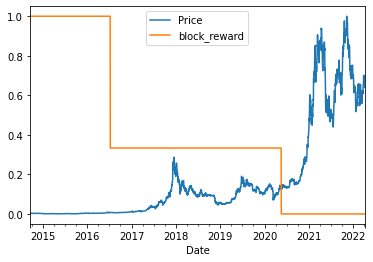

In [ ]:
# plot block reward vs price over time

from sklearn.preprocessing import minmax_scale

scaled_price_block_df=pd.DataFrame(minmax_scale(bitcoin_prices_block[["Price","block_reward"]]),
                                   columns=bitcoin_prices_block.columns,
                                   index=bitcoin_prices_block.index)


scaled_price_block_df.plot()

## Making a windowed dataset with pandas


In [ ]:
HORIZON=1

WINDOW=7


In [ ]:
# make a copy of historical data with block reward feaures

bitcoin_prices_windowed=bitcoin_prices_block.copy()

# add windowed columns

for i in range(WINDOW): # shift values for each step in WINDOW
  bitcoin_prices_windowed[f"Price+{i+1}"]=bitcoin_prices_windowed["Price"].shift(periods=i+1)

bitcoin_prices_windowed.head(10)

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2014-09-17,457.334015,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-18,424.440002,25,457.334015,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-19,394.795990,25,424.440002,457.334015,NaN,NaN,NaN,NaN,NaN
2014-09-20,408.903992,25,394.795990,424.440002,457.334015,NaN,NaN,NaN,NaN
2014-09-21,398.821014,25,408.903992,394.795990,424.440002,457.334015,NaN,NaN,NaN
2014-09-22,402.152008,25,398.821014,408.903992,394.795990,424.440002,457.334015,NaN,NaN
2014-09-23,435.790985,25,402.152008,398.821014,408.903992,394.795990,424.440002,457.334015,NaN
2014-09-24,423.204987,25,435.790985,402.152008,398.821014,408.903992,394.795990,424.440002,457.334015
2014-09-25,411.574005,25,423.204987,435.790985,402.152008,398.821014,408.903992,394.795990,424.440002


In [ ]:
# create X(windows) and y(horizons) features

X=bitcoin_prices_windowed.dropna().drop("Price",axis=1).astype(np.float32)

y=bitcoin_prices_windowed.dropna()["Price"].astype(np.float32)

X.head()

,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2014-09-24,25.0,435.790985,402.152008,398.821014,408.903992,394.795990,424.440002,457.334015
2014-09-25,25.0,423.204987,435.790985,402.152008,398.821014,408.903992,394.795990,424.440002
2014-09-26,25.0,411.574005,423.204987,435.790985,402.152008,398.821014,408.903992,394.795990
2014-09-27,25.0,404.424988,411.574005,423.204987,435.790985,402.152008,398.821014,408.903992
2014-09-28,25.0,399.519989,404.424988,411.574005,423.204987,435.790985,402.152008,398.821014


In [ ]:
y.head()

Date
2014-09-24    423.204987
2014-09-25    411.574005
2014-09-26    404.424988
2014-09-27    399.519989
2014-09-28    377.181000
Name: Price, dtype: float32

In [ ]:
# make train and test set 

split_size=int(0.8*len(X))

X_train,y_train=X[:split_size],y[:split_size]

X_test,y_test=X[split_size:],y[split_size:]

len(X_train), len(y_train), len(X_test), len(y_test)


(2202, 2202, 551, 551)

In [ ]:
X_train.head(),y_train.head()

(            block_reward     Price+1     Price+2     Price+3     Price+4  \
 Date                                                                       
 2014-09-24          25.0  435.790985  402.152008  398.821014  408.903992   
 2014-09-25          25.0  423.204987  435.790985  402.152008  398.821014   
 2014-09-26          25.0  411.574005  423.204987  435.790985  402.152008   
 2014-09-27          25.0  404.424988  411.574005  423.204987  435.790985   
 2014-09-28          25.0  399.519989  404.424988  411.574005  423.204987   
 
                Price+5     Price+6     Price+7  
 Date                                            
 2014-09-24  394.795990  424.440002  457.334015  
 2014-09-25  408.903992  394.795990  424.440002  
 2014-09-26  398.821014  408.903992  394.795990  
 2014-09-27  402.152008  398.821014  408.903992  
 2014-09-28  435.790985  402.152008  398.821014  , Date
 2014-09-24    423.204987
 2014-09-25    411.574005
 2014-09-26    404.424988
 2014-09-27    399.519989

## Model 6: Dense(multivariate time series)

In [ ]:
tf.random.set_seed(42)

# create a  model

model_6=tf.keras.Sequential([
                             
        layers.Dense(128,activation="relu"),
        layers.Dense(HORIZON)

],name="model_6_dense_multivariate")

# compile the model

model_6.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# fit the model

model_6.fit(X_train,y_train,epochs=100,batch_size=128,
            verbose=1,validation_data=(X_test,y_test),
            callbacks=[create_model_checkpoint(model_name=model_6.name)])


Epoch 1/100
 1/18 [>.............................] - ETA: 4s - loss: 3378.7856INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 30ms/step - loss: 1731.5081 - val_loss: 4318.7627
Epoch 2/100
 1/18 [>.............................] - ETA: 0s - loss: 480.5333INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 27ms/step - loss: 418.0499 - val_loss: 3142.1067
Epoch 3/100
 1/18 [>.............................] - ETA: 0s - loss: 218.2393INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 25ms/step - loss: 281.1311 - val_loss: 2514.2688
Epoch 4/100
 1/18 [>.............................] - ETA: 0s - loss: 280.4143INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 25ms/step - loss: 261.3302 - val_loss: 2364.7417
Epoch 5/100
 1/18 [>.............................] - ETA: 0s - loss: 173.2478INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 24ms/step - loss: 248.4090 - val_loss: 2194.4421
Epoch 6/100
 1/18 [>.............................] - ETA: 0s - loss: 230.5262INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 23ms/step - loss: 242.1240 - val_loss: 2138.7961
Epoch 7/100
 1/18 [>.............................] - ETA: 0s - loss: 239.1401INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 24ms/step - loss: 236.1614 - val_loss: 2109.3843
Epoch 8/100
 1/18 [>.............................] - ETA: 0s - loss: 223.8988INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 24ms/step - loss: 230.9507 - val_loss: 2046.4995
Epoch 9/100
 1/18 [>.............................] - ETA: 0s - loss: 188.6500INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 24ms/step - loss: 227.1376 - val_loss: 1996.5168
Epoch 10/100
 1/18 [>.............................] - ETA: 0s - loss: 208.7313INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 25ms/step - loss: 223.5288 - val_loss: 1896.0375
Epoch 11/100
 1/18 [>.............................] - ETA: 0s - loss: 262.7115INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 25ms/step - loss: 215.3345 - val_loss: 1845.5852
Epoch 12/100
 1/18 [>.............................] - ETA: 0s - loss: 198.5700INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 23ms/step - loss: 197.4263 - val_loss: 1756.8241
Epoch 13/100
 1/18 [>.............................] - ETA: 0s - loss: 249.3817INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 24ms/step - loss: 191.1482 - val_loss: 1744.1664
Epoch 14/100
18/18 [==============================] - 0s 4ms/step - loss: 189.5711 - val_loss: 1755.7072
Epoch 15/100
18/18 [==============================] - 0s 3ms/step - loss: 183.3994 - val_loss: 1773.4856
Epoch 16/100
18/18 [==============================] - 0s 5ms/step - loss: 186.2925 - val_loss: 1786.6342
Epoch 17/100
 1/18 [>.............................] - ETA: 0s - loss: 177.3432INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 24ms/step - loss: 177.7974 - val_loss: 1552.3156
Epoch 18/100
 1/18 [>.............................] - ETA: 0s - loss: 151.0011INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 26ms/step - loss: 168.6041 - val_loss: 1505.0144
Epoch 19/100
 1/18 [>.............................] - ETA: 0s - loss: 145.1830INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 39ms/step - loss: 159.3548 - val_loss: 1443.6306
Epoch 20/100
18/18 [==============================] - 0s 4ms/step - loss: 156.2333 - val_loss: 1448.2595
Epoch 21/100
 1/18 [>.............................] - ETA: 0s - loss: 170.5246INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 25ms/step - loss: 157.3586 - val_loss: 1411.1482
Epoch 22/100
18/18 [==============================] - 0s 4ms/step - loss: 151.7883 - val_loss: 1428.6007
Epoch 23/100
 1/18 [>.............................] - ETA: 0s - loss: 163.6504INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 26ms/step - loss: 151.1575 - val_loss: 1381.0100
Epoch 24/100
 1/18 [>.............................] - ETA: 0s - loss: 167.1577INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 25ms/step - loss: 148.0745 - val_loss: 1354.3665
Epoch 25/100
18/18 [==============================] - 0s 4ms/step - loss: 146.0390 - val_loss: 1374.8713
Epoch 26/100
 1/18 [>.............................] - ETA: 0s - loss: 103.7873INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 25ms/step - loss: 151.3335 - val_loss: 1327.9625
Epoch 27/100
18/18 [==============================] - 0s 4ms/step - loss: 143.3898 - val_loss: 1335.2678
Epoch 28/100
18/18 [==============================] - 0s 4ms/step - loss: 144.2630 - val_loss: 1344.0543
Epoch 29/100
18/18 [==============================] - 0s 4ms/step - loss: 145.6413 - val_loss: 1521.2202
Epoch 30/100
18/18 [==============================] - 0s 4ms/step - loss: 152.5563 - val_loss: 1422.7397
Epoch 31/100
 1/18 [>.............................] - ETA: 0s - loss: 144.6809INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 25ms/step - loss: 144.2346 - val_loss: 1312.2043
Epoch 32/100
18/18 [==============================] - 0s 4ms/step - loss: 139.3280 - val_loss: 1346.4430
Epoch 33/100
 1/18 [>.............................] - ETA: 0s - loss: 141.0343INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 25ms/step - loss: 148.0850 - val_loss: 1281.3514
Epoch 34/100
18/18 [==============================] - 0s 3ms/step - loss: 142.4509 - val_loss: 1358.6046
Epoch 35/100
18/18 [==============================] - 0s 4ms/step - loss: 145.4916 - val_loss: 1284.7010
Epoch 36/100
18/18 [==============================] - 0s 4ms/step - loss: 136.6197 - val_loss: 1286.0083
Epoch 37/100
 1/18 [>.............................] - ETA: 0s - loss: 141.7771INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 25ms/step - loss: 139.5834 - val_loss: 1261.5232
Epoch 38/100
 1/18 [>.............................] - ETA: 0s - loss: 176.2522INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 25ms/step - loss: 136.9214 - val_loss: 1258.5225
Epoch 39/100
 1/18 [>.............................] - ETA: 0s - loss: 122.5047INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 25ms/step - loss: 136.6898 - val_loss: 1256.4260
Epoch 40/100
18/18 [==============================] - 0s 4ms/step - loss: 133.3136 - val_loss: 1266.9657
Epoch 41/100
18/18 [==============================] - 0s 3ms/step - loss: 133.9879 - val_loss: 1298.1849
Epoch 42/100
18/18 [==============================] - 0s 3ms/step - loss: 135.8221 - val_loss: 1259.6381
Epoch 43/100
18/18 [==============================] - 0s 4ms/step - loss: 133.5476 - val_loss: 1259.4260
Epoch 44/100
 1/18 [>.............................] - ETA: 0s - loss: 124.4939INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 25ms/step - loss: 132.3716 - val_loss: 1242.7196
Epoch 45/100
18/18 [==============================] - 0s 4ms/step - loss: 136.4338 - val_loss: 1472.3566
Epoch 46/100
18/18 [==============================] - 0s 4ms/step - loss: 139.3840 - val_loss: 1294.0518
Epoch 47/100
 1/18 [>.............................] - ETA: 0s - loss: 140.0683INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 24ms/step - loss: 132.3066 - val_loss: 1241.0972
Epoch 48/100
18/18 [==============================] - 0s 5ms/step - loss: 132.2829 - val_loss: 1335.0597
Epoch 49/100
18/18 [==============================] - 0s 4ms/step - loss: 138.0817 - val_loss: 1263.2872
Epoch 50/100
 1/18 [>.............................] - ETA: 0s - loss: 99.5075INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 25ms/step - loss: 134.3281 - val_loss: 1239.7791
Epoch 51/100
18/18 [==============================] - 0s 4ms/step - loss: 135.0520 - val_loss: 1255.2886
Epoch 52/100
 1/18 [>.............................] - ETA: 0s - loss: 131.8639INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 25ms/step - loss: 132.2512 - val_loss: 1226.0762
Epoch 53/100
 1/18 [>.............................] - ETA: 0s - loss: 128.8888INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 25ms/step - loss: 134.6754 - val_loss: 1216.9755
Epoch 54/100
18/18 [==============================] - 0s 4ms/step - loss: 134.1159 - val_loss: 1423.8787
Epoch 55/100
18/18 [==============================] - 0s 4ms/step - loss: 139.0677 - val_loss: 1274.1364
Epoch 56/100
18/18 [==============================] - 0s 4ms/step - loss: 145.3303 - val_loss: 1400.6918
Epoch 57/100
18/18 [==============================] - 0s 4ms/step - loss: 140.4019 - val_loss: 1229.6599
Epoch 58/100
18/18 [==============================] - 0s 4ms/step - loss: 130.4441 - val_loss: 1229.4110
Epoch 59/100
18/18 [==============================] - 0s 4ms/step - loss: 132.3653 - val_loss: 1225.4855
Epoch 60/100
18/18 [==============================] - 0s 4ms/step - loss: 132.1506 - val_loss: 1229.7056
Epoch 61/100
18/18 [==============================] - 0s 4ms/step - loss: 135.0256 - val_loss: 1276.7698
Epoch 62/100
 1/18 [>.............................] - ETA: 0s - los

INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 25ms/step - loss: 133.2626 - val_loss: 1210.9783
Epoch 63/100
18/18 [==============================] - 0s 4ms/step - loss: 129.3978 - val_loss: 1281.8641
Epoch 64/100
18/18 [==============================] - 0s 3ms/step - loss: 139.9938 - val_loss: 1251.9183
Epoch 65/100
18/18 [==============================] - 0s 4ms/step - loss: 135.9755 - val_loss: 1264.3763
Epoch 66/100
18/18 [==============================] - 0s 3ms/step - loss: 131.8420 - val_loss: 1213.6432
Epoch 67/100
18/18 [==============================] - 0s 4ms/step - loss: 129.6516 - val_loss: 1217.8386
Epoch 68/100
18/18 [==============================] - 0s 4ms/step - loss: 129.4644 - val_loss: 1214.0242
Epoch 69/100
18/18 [==============================] - 0s 4ms/step - loss: 130.7983 - val_loss: 1225.5692
Epoch 70/100
18/18 [==============================] - 0s 4ms/step - loss: 128.5977 - val_loss: 1222.9868
Epoch 71/100
 1/18 [>.............................] - ETA: 0s - los

INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 24ms/step - loss: 130.9054 - val_loss: 1207.1470
Epoch 72/100
18/18 [==============================] - 0s 4ms/step - loss: 130.0945 - val_loss: 1248.6437
Epoch 73/100
18/18 [==============================] - 0s 3ms/step - loss: 130.3077 - val_loss: 1250.2365
Epoch 74/100
18/18 [==============================] - 0s 4ms/step - loss: 132.4622 - val_loss: 1462.7107
Epoch 75/100
18/18 [==============================] - 0s 4ms/step - loss: 136.8631 - val_loss: 1227.2465
Epoch 76/100
18/18 [==============================] - 0s 3ms/step - loss: 129.0696 - val_loss: 1213.5894
Epoch 77/100
18/18 [==============================] - 0s 3ms/step - loss: 129.2814 - val_loss: 1238.6128
Epoch 78/100
18/18 [==============================] - 0s 4ms/step - loss: 133.6331 - val_loss: 1213.4508
Epoch 79/100
18/18 [==============================] - 0s 4ms/step - loss: 131.0839 - val_loss: 1321.8267
Epoch 80/100
18/18 [==============================] - 0s 4ms/step -

INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 24ms/step - loss: 131.6553 - val_loss: 1200.6665
Epoch 83/100
18/18 [==============================] - 0s 4ms/step - loss: 130.4255 - val_loss: 1207.3295
Epoch 84/100
 1/18 [>.............................] - ETA: 0s - loss: 129.2397INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 25ms/step - loss: 129.2208 - val_loss: 1199.2499
Epoch 85/100
18/18 [==============================] - 0s 4ms/step - loss: 131.4289 - val_loss: 1209.0837
Epoch 86/100
18/18 [==============================] - 0s 4ms/step - loss: 128.4302 - val_loss: 1201.3217
Epoch 87/100
18/18 [==============================] - 0s 4ms/step - loss: 129.1405 - val_loss: 1248.4877
Epoch 88/100
18/18 [==============================] - 0s 4ms/step - loss: 130.9881 - val_loss: 1318.2306
Epoch 89/100
18/18 [==============================] - 0s 4ms/step - loss: 134.9881 - val_loss: 1233.1809
Epoch 90/100
18/18 [==============================] - 0s 4ms/step - loss: 131.8792 - val_loss: 1233.6331
Epoch 91/100
 1/18 [>.............................] - ETA: 0s - loss: 167.2204INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 25ms/step - loss: 129.1362 - val_loss: 1198.5168
Epoch 92/100
18/18 [==============================] - 0s 4ms/step - loss: 128.7798 - val_loss: 1203.6030
Epoch 93/100
18/18 [==============================] - 0s 4ms/step - loss: 128.0381 - val_loss: 1200.8903
Epoch 94/100
 1/18 [>.............................] - ETA: 0s - loss: 125.4984INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 26ms/step - loss: 139.2430 - val_loss: 1198.4503
Epoch 95/100
18/18 [==============================] - 0s 4ms/step - loss: 135.6533 - val_loss: 1218.1696
Epoch 96/100
18/18 [==============================] - 0s 5ms/step - loss: 128.8087 - val_loss: 1286.3433
Epoch 97/100
18/18 [==============================] - 0s 5ms/step - loss: 129.9919 - val_loss: 1214.1200
Epoch 98/100
18/18 [==============================] - 0s 5ms/step - loss: 129.6770 - val_loss: 1202.8486
Epoch 99/100
18/18 [==============================] - 0s 4ms/step - loss: 132.3154 - val_loss: 1230.6196
Epoch 100/100
18/18 [==============================] - 0s 4ms/step - loss: 128.6627 - val_loss: 1215.5994


In [ ]:
# evaluate multivariate model
model_6.evaluate(X_test,y_test)

18/18 [==============================] - 0s 2ms/step - loss: 1215.5994


1215.599365234375

In [ ]:
# load in the best performing model and evalaute it

model_6=tf.keras.models.load_model("model_experiments/model_6_dense_multivariate")

model_6.evaluate(X_test,y_test)

18/18 [==============================] - 0s 2ms/step - loss: 1198.4502


1198.4501953125

In [ ]:
# make predictions

model_6_preds=make_preds(model_6,X_test)

model_6_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([10549.91 , 10640.029, 10779.102, 10634.98 , 10653.487, 10891.089,
       11042.926, 11265.135, 11393.169, 11544.705], dtype=float32)>

In [ ]:
model_6_results=evaluate_preds(y_true=y_test,
                               y_pred=model_6_preds)

model_6_results

{'mae': 1198.4502,
 'mape': 2.8962464,
 'mase': 1.0104822,
 'mse': 2848131.8,
 'rmse': 1687.6409}

In [ ]:
model_1_results

{'mae': 1200.7169,
 'mape': 2.902458,
 'mase': 1.0123935,
 'mse': 2871865.5,
 'rmse': 1694.658}

In [ ]:
naive_results

{'mae': 1184.0837,
 'mape': 2.8548772,
 'mase': 0.99836904,
 'mse': 2807027.2,
 'rmse': 1675.4185}

In [ ]:
merged_array=np.stack([X_train["Price+1"],X_train["Price+2"],X_train["Price+3"],X_train["Price+4"],X_train["Price+5"],
                       X_train["Price+6"],X_train["Price+7"],X_train["block_reward"]])

merged_array_test=np.stack([X_test["Price+1"],X_test["Price+2"],X_test["Price+3"],X_test["Price+4"],X_test["Price+5"],
                       X_test["Price+6"],X_test["Price+7"],X_test["block_reward"]])

In [ ]:
tf.random.set_seed(42)

# create a  model

model_6=tf.keras.Sequential([
                             
        layers.Dense(128,input_dim=8,activation="relu"),
        layers.Dense(HORIZON)

],name="model_6_dense_multivariate_mi")

# compile the model

model_6.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# fit the model

model_6.fit(merged_array.T,y_train,epochs=100,batch_size=128,
            verbose=1,validation_data=(merged_array_test.T,y_test),
            callbacks=[create_model_checkpoint(model_name=model_6.name)])


Epoch 1/100
 1/18 [>.............................] - ETA: 4s - loss: 2501.4568INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate_mi/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate_mi/assets


18/18 [==============================] - 1s 31ms/step - loss: 1072.5103 - val_loss: 5017.9219
Epoch 2/100
 1/18 [>.............................] - ETA: 0s - loss: 545.1050INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate_mi/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate_mi/assets


18/18 [==============================] - 0s 24ms/step - loss: 324.3596 - val_loss: 2170.9434
Epoch 3/100
 1/18 [>.............................] - ETA: 0s - loss: 187.7216INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate_mi/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate_mi/assets


18/18 [==============================] - 0s 25ms/step - loss: 233.3411 - val_loss: 1887.7075
Epoch 4/100
 1/18 [>.............................] - ETA: 0s - loss: 227.7087INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate_mi/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate_mi/assets


18/18 [==============================] - 0s 26ms/step - loss: 207.3789 - val_loss: 1837.8359
Epoch 5/100
 1/18 [>.............................] - ETA: 0s - loss: 132.5105INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate_mi/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate_mi/assets


18/18 [==============================] - 0s 25ms/step - loss: 201.5041 - val_loss: 1773.8622
Epoch 6/100
 1/18 [>.............................] - ETA: 0s - loss: 189.0678INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate_mi/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate_mi/assets


18/18 [==============================] - 0s 26ms/step - loss: 195.6046 - val_loss: 1750.2263
Epoch 7/100
 1/18 [>.............................] - ETA: 0s - loss: 189.6751INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate_mi/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate_mi/assets


18/18 [==============================] - 0s 24ms/step - loss: 187.4772 - val_loss: 1671.6047
Epoch 8/100
 1/18 [>.............................] - ETA: 0s - loss: 180.7294INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate_mi/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate_mi/assets


18/18 [==============================] - 0s 24ms/step - loss: 184.0839 - val_loss: 1657.7125
Epoch 9/100
 1/18 [>.............................] - ETA: 0s - loss: 163.0508INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate_mi/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate_mi/assets


18/18 [==============================] - 0s 25ms/step - loss: 183.2417 - val_loss: 1602.6757
Epoch 10/100
18/18 [==============================] - 0s 4ms/step - loss: 176.9090 - val_loss: 1616.2877
Epoch 11/100
 1/18 [>.............................] - ETA: 0s - loss: 209.0536INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate_mi/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate_mi/assets


18/18 [==============================] - 0s 25ms/step - loss: 168.8616 - val_loss: 1542.7352
Epoch 12/100
 1/18 [>.............................] - ETA: 0s - loss: 164.3910INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate_mi/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate_mi/assets


18/18 [==============================] - 0s 25ms/step - loss: 166.0322 - val_loss: 1485.6198
Epoch 13/100
18/18 [==============================] - 0s 5ms/step - loss: 160.1644 - val_loss: 1496.7867
Epoch 14/100
 1/18 [>.............................] - ETA: 0s - loss: 183.6358INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate_mi/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate_mi/assets


18/18 [==============================] - 0s 24ms/step - loss: 161.4562 - val_loss: 1445.6497
Epoch 15/100
18/18 [==============================] - 0s 3ms/step - loss: 159.1993 - val_loss: 1464.8877
Epoch 16/100
18/18 [==============================] - 0s 3ms/step - loss: 160.5582 - val_loss: 1500.5990
Epoch 17/100
18/18 [==============================] - 0s 3ms/step - loss: 154.8163 - val_loss: 1452.1711
Epoch 18/100
18/18 [==============================] - 0s 3ms/step - loss: 159.9487 - val_loss: 1483.4263
Epoch 19/100
 1/18 [>.............................] - ETA: 0s - loss: 155.6034INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate_mi/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate_mi/assets


18/18 [==============================] - 0s 25ms/step - loss: 152.5086 - val_loss: 1367.5779
Epoch 20/100
 1/18 [>.............................] - ETA: 0s - loss: 137.9889INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate_mi/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate_mi/assets


18/18 [==============================] - 0s 24ms/step - loss: 148.3528 - val_loss: 1349.5571
Epoch 21/100
 1/18 [>.............................] - ETA: 0s - loss: 162.8284INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate_mi/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate_mi/assets


18/18 [==============================] - 0s 25ms/step - loss: 146.9908 - val_loss: 1323.8892
Epoch 22/100
18/18 [==============================] - 0s 4ms/step - loss: 143.8254 - val_loss: 1342.6176
Epoch 23/100
 1/18 [>.............................] - ETA: 0s - loss: 157.9532INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate_mi/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate_mi/assets


18/18 [==============================] - 0s 25ms/step - loss: 143.7346 - val_loss: 1311.5198
Epoch 24/100
18/18 [==============================] - 0s 4ms/step - loss: 146.5616 - val_loss: 1331.1044
Epoch 25/100
18/18 [==============================] - 0s 3ms/step - loss: 143.4400 - val_loss: 1314.6750
Epoch 26/100
 1/18 [>.............................] - ETA: 0s - loss: 95.8776INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate_mi/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate_mi/assets


18/18 [==============================] - 0s 24ms/step - loss: 146.7831 - val_loss: 1290.7885
Epoch 27/100
 1/18 [>.............................] - ETA: 0s - loss: 143.9335INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate_mi/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate_mi/assets


18/18 [==============================] - 0s 25ms/step - loss: 140.9614 - val_loss: 1290.4594
Epoch 28/100
18/18 [==============================] - 0s 4ms/step - loss: 141.4821 - val_loss: 1297.6390
Epoch 29/100
18/18 [==============================] - 0s 5ms/step - loss: 141.9137 - val_loss: 1426.8529
Epoch 30/100
 1/18 [>.............................] - ETA: 0s - loss: 190.7650INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate_mi/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate_mi/assets


18/18 [==============================] - 0s 27ms/step - loss: 149.8309 - val_loss: 1273.7709
Epoch 31/100
 1/18 [>.............................] - ETA: 0s - loss: 124.9114INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate_mi/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate_mi/assets


18/18 [==============================] - 0s 26ms/step - loss: 144.2043 - val_loss: 1257.4756
Epoch 32/100
18/18 [==============================] - 0s 4ms/step - loss: 136.7990 - val_loss: 1284.8237
Epoch 33/100
 1/18 [>.............................] - ETA: 0s - loss: 136.6786INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate_mi/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate_mi/assets


18/18 [==============================] - 0s 25ms/step - loss: 144.6955 - val_loss: 1246.8792
Epoch 34/100
18/18 [==============================] - 0s 4ms/step - loss: 139.9262 - val_loss: 1333.3567
Epoch 35/100
18/18 [==============================] - 0s 4ms/step - loss: 147.3557 - val_loss: 1258.6624
Epoch 36/100
18/18 [==============================] - 0s 3ms/step - loss: 135.7134 - val_loss: 1273.8715
Epoch 37/100
 1/18 [>.............................] - ETA: 0s - loss: 141.5616INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate_mi/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate_mi/assets


18/18 [==============================] - 1s 40ms/step - loss: 139.9887 - val_loss: 1237.1875
Epoch 38/100
18/18 [==============================] - 0s 3ms/step - loss: 140.2041 - val_loss: 1240.5662
Epoch 39/100
 1/18 [>.............................] - ETA: 0s - loss: 124.4195INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate_mi/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate_mi/assets


18/18 [==============================] - 0s 25ms/step - loss: 135.5090 - val_loss: 1236.7107
Epoch 40/100
 1/18 [>.............................] - ETA: 0s - loss: 165.1374INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate_mi/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate_mi/assets


18/18 [==============================] - 0s 24ms/step - loss: 132.5494 - val_loss: 1229.3154
Epoch 41/100
18/18 [==============================] - 0s 4ms/step - loss: 132.5574 - val_loss: 1336.9388
Epoch 42/100
18/18 [==============================] - 0s 3ms/step - loss: 136.6720 - val_loss: 1257.3643
Epoch 43/100
 1/18 [>.............................] - ETA: 0s - loss: 95.0638INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate_mi/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate_mi/assets


18/18 [==============================] - 0s 25ms/step - loss: 132.5259 - val_loss: 1215.5454
Epoch 44/100
18/18 [==============================] - 0s 4ms/step - loss: 132.0231 - val_loss: 1254.1954
Epoch 45/100
18/18 [==============================] - 0s 4ms/step - loss: 137.6804 - val_loss: 1376.7450
Epoch 46/100
18/18 [==============================] - 0s 4ms/step - loss: 134.7765 - val_loss: 1288.5536
Epoch 47/100
 1/18 [>.............................] - ETA: 0s - loss: 139.9426INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate_mi/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate_mi/assets


18/18 [==============================] - 0s 26ms/step - loss: 132.1502 - val_loss: 1208.6304
Epoch 48/100
18/18 [==============================] - 0s 4ms/step - loss: 130.4375 - val_loss: 1222.7874
Epoch 49/100
18/18 [==============================] - 0s 4ms/step - loss: 130.5015 - val_loss: 1287.1229
Epoch 50/100
18/18 [==============================] - 0s 4ms/step - loss: 135.2503 - val_loss: 1241.9254
Epoch 51/100
18/18 [==============================] - 0s 3ms/step - loss: 132.7458 - val_loss: 1216.8457
Epoch 52/100
18/18 [==============================] - 0s 4ms/step - loss: 130.6716 - val_loss: 1213.3041
Epoch 53/100
 1/18 [>.............................] - ETA: 0s - loss: 127.3175INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate_mi/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate_mi/assets


18/18 [==============================] - 0s 24ms/step - loss: 132.4699 - val_loss: 1202.4163
Epoch 54/100
18/18 [==============================] - 0s 4ms/step - loss: 139.8008 - val_loss: 1299.7275
Epoch 55/100
18/18 [==============================] - 0s 4ms/step - loss: 136.2536 - val_loss: 1314.7057
Epoch 56/100
18/18 [==============================] - 0s 4ms/step - loss: 146.7841 - val_loss: 1239.7521
Epoch 57/100
18/18 [==============================] - 0s 3ms/step - loss: 133.1485 - val_loss: 1292.0424
Epoch 58/100
 1/18 [>.............................] - ETA: 0s - loss: 143.5232INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate_mi/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate_mi/assets


18/18 [==============================] - 0s 25ms/step - loss: 138.3421 - val_loss: 1196.4093
Epoch 59/100
18/18 [==============================] - 0s 4ms/step - loss: 139.7440 - val_loss: 1372.7483
Epoch 60/100
18/18 [==============================] - 0s 4ms/step - loss: 140.7361 - val_loss: 1395.7808
Epoch 61/100
18/18 [==============================] - 0s 4ms/step - loss: 139.9877 - val_loss: 1267.5690
Epoch 62/100
 1/18 [>.............................] - ETA: 0s - loss: 107.1923INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate_mi/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate_mi/assets


18/18 [==============================] - 0s 24ms/step - loss: 132.9638 - val_loss: 1194.0070
Epoch 63/100
18/18 [==============================] - 0s 4ms/step - loss: 129.8989 - val_loss: 1259.1813
Epoch 64/100
18/18 [==============================] - 0s 4ms/step - loss: 138.1936 - val_loss: 1245.0616
Epoch 65/100
18/18 [==============================] - 0s 4ms/step - loss: 136.8578 - val_loss: 1220.2338
Epoch 66/100
18/18 [==============================] - 0s 3ms/step - loss: 131.8077 - val_loss: 1195.0536
Epoch 67/100
18/18 [==============================] - 0s 4ms/step - loss: 128.7025 - val_loss: 1219.4954
Epoch 68/100
18/18 [==============================] - 0s 4ms/step - loss: 129.8879 - val_loss: 1196.1089
Epoch 69/100
18/18 [==============================] - 0s 4ms/step - loss: 128.6376 - val_loss: 1219.7988
Epoch 70/100
18/18 [==============================] - 0s 4ms/step - loss: 132.6257 - val_loss: 1282.6339
Epoch 71/100
 1/18 [>.............................] - ETA: 0s - los

INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate_mi/assets


18/18 [==============================] - 0s 25ms/step - loss: 133.6159 - val_loss: 1193.8864
Epoch 72/100
18/18 [==============================] - 0s 4ms/step - loss: 131.3150 - val_loss: 1293.9965
Epoch 73/100
 1/18 [>.............................] - ETA: 0s - loss: 118.5841INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate_mi/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate_mi/assets


18/18 [==============================] - 0s 25ms/step - loss: 131.4417 - val_loss: 1192.2058
Epoch 74/100
18/18 [==============================] - 0s 5ms/step - loss: 131.9566 - val_loss: 1482.1119
Epoch 75/100
 1/18 [>.............................] - ETA: 0s - loss: 132.0949INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate_mi/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate_mi/assets


18/18 [==============================] - 0s 26ms/step - loss: 136.4528 - val_loss: 1190.1370
Epoch 76/100
18/18 [==============================] - 0s 4ms/step - loss: 129.6821 - val_loss: 1230.3759
Epoch 77/100
 1/18 [>.............................] - ETA: 0s - loss: 182.3880INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate_mi/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate_mi/assets


18/18 [==============================] - 0s 24ms/step - loss: 130.6663 - val_loss: 1188.9784
Epoch 78/100
18/18 [==============================] - 0s 4ms/step - loss: 130.7444 - val_loss: 1212.6847
Epoch 79/100
18/18 [==============================] - 0s 3ms/step - loss: 128.9659 - val_loss: 1417.2885
Epoch 80/100
18/18 [==============================] - 0s 4ms/step - loss: 146.1063 - val_loss: 1193.3806
Epoch 81/100
18/18 [==============================] - 0s 4ms/step - loss: 129.2997 - val_loss: 1190.1764
Epoch 82/100
18/18 [==============================] - 0s 4ms/step - loss: 129.1065 - val_loss: 1192.1790
Epoch 83/100
18/18 [==============================] - ETA: 0s - loss: 130.4304INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate_mi/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate_mi/assets


18/18 [==============================] - 0s 25ms/step - loss: 130.4304 - val_loss: 1188.8055
Epoch 84/100
 1/18 [>.............................] - ETA: 0s - loss: 130.6467INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate_mi/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate_mi/assets


18/18 [==============================] - 0s 24ms/step - loss: 130.6542 - val_loss: 1187.4156
Epoch 85/100
18/18 [==============================] - 0s 4ms/step - loss: 131.0046 - val_loss: 1238.4548
Epoch 86/100
18/18 [==============================] - 0s 5ms/step - loss: 129.8656 - val_loss: 1191.3228
Epoch 87/100
18/18 [==============================] - 0s 4ms/step - loss: 128.9742 - val_loss: 1287.1322
Epoch 88/100
18/18 [==============================] - 0s 3ms/step - loss: 132.6661 - val_loss: 1238.5319
Epoch 89/100
18/18 [==============================] - 0s 5ms/step - loss: 131.5735 - val_loss: 1233.8403
Epoch 90/100
18/18 [==============================] - 0s 3ms/step - loss: 130.5608 - val_loss: 1261.9962
Epoch 91/100
18/18 [==============================] - 0s 3ms/step - loss: 131.0855 - val_loss: 1202.9183
Epoch 92/100
18/18 [==============================] - 0s 4ms/step - loss: 128.9674 - val_loss: 1190.0668
Epoch 93/100
18/18 [==============================] - 0s 4ms/step -

INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate_mi/assets


18/18 [==============================] - 0s 24ms/step - loss: 139.6358 - val_loss: 1187.1829
Epoch 95/100
18/18 [==============================] - 0s 4ms/step - loss: 136.5640 - val_loss: 1211.7729
Epoch 96/100
18/18 [==============================] - 0s 4ms/step - loss: 129.5853 - val_loss: 1353.9370
Epoch 97/100
18/18 [==============================] - 0s 3ms/step - loss: 133.1481 - val_loss: 1192.2994
Epoch 98/100
18/18 [==============================] - 0s 3ms/step - loss: 128.1490 - val_loss: 1227.0901
Epoch 99/100
18/18 [==============================] - 0s 4ms/step - loss: 131.8377 - val_loss: 1189.0602
Epoch 100/100
18/18 [==============================] - 0s 3ms/step - loss: 128.0079 - val_loss: 1200.3728


In [ ]:
model_6=tf.keras.models.load_model("model_experiments/model_6_dense_multivariate_mi")
model_6.evaluate(merged_array_test.T,y_test)

18/18 [==============================] - 0s 2ms/step - loss: 1187.1827


1187.1827392578125

In [ ]:
naive_results

{'mae': 1184.0837,
 'mape': 2.8548772,
 'mase': 0.99836904,
 'mse': 2807027.2,
 'rmse': 1675.4185}

## Model 7: N-BEATS Algorithm

### Building and testing the N-BEATS block layer


In [ ]:
# create NBeatsBlock custom layer

class NBeatsBlock(tf.keras.layers.Layer):
  
  def __init__(self,
               input_size: int,
               theta_size: int,
               horizon: int,
               n_neurons: int,
               n_layers: int,
               **kwargs): # the **kwargs argument takes care of all the arguments for parent class
                
    super().__init__(**kwargs)
    self.input_size=input_size
    self.theta_size=theta_size
    self.horizon=horizon
    self.n_neurons=n_neurons
    self.n_layers=n_layers

    # Block contains stack of 4 fully connected layer, each has ReLu activation

    self.hidden=[tf.keras.layers.Dense(n_neurons,activation="relu") for _ in range(n_layers)]

    # output of block is a theta layer with linear activation

    self.theta_layer=tf.keras.layers.Dense(theta_size,activation="linear",name="theta")

  
  def call(self,inputs): 
    
    x=inputs
    
    for layer in self.hidden: # pass input through each hidden layer
      x=layer(x)
    
    theta=self.theta_layer(x)

    # output the backcast and forecast from theta

    backcast,forecast=theta[:,:self.input_size], theta[:,-self.horizon:]

    return backcast,forecast 

In [ ]:
# set up dummy NBeatsBlock layer to represent inputs and outputs
tf.random.set_seed(42)
dummy_nbeats_block_layer=NBeatsBlock(input_size=WINDOW,
                                     theta_size=WINDOW+HORIZON, # backcast + forecast
                                     horizon=HORIZON,
                                     n_neurons=128,
                                     n_layers=4)



In [ ]:
# create dummy inputs (have to be same size as input_size)

dummy_inputs= tf.expand_dims(tf.range(WINDOW)+1,axis=0) # input shape to the model has to reflect dense layer input requirements (ndims=2)

dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [ ]:
# pass dummy inputs to dummy NBeatsBlock layer

backcast,forecast=dummy_nbeats_block_layer(dummy_inputs)

# these are the activation outputs of the theta layer (random due to no training of model)

print(f"Backcast: {tf.squeeze(backcast.numpy())}")

print(f"Forecast: {tf.squeeze(forecast.numpy())}")


Backcast: [ 0.07960171  0.32512033 -0.8428683  -0.6938985  -0.31720552 -0.5698734
 -0.6396662 ]
Forecast: 1.0071648359298706


### Preparing data for the N-Beats algorithm using `tf.data`

In [ ]:
HORIZON=1
WINDOW=7

In [ ]:
# create nbeats data inputs (nbeats works with univariate time series)
bitcoin_prices.head()

,Price
Date,
2014-09-17,457.334015
2014-09-18,424.440002
2014-09-19,394.795990
2014-09-20,408.903992
2014-09-21,398.821014


In [ ]:
# add windowed columns
bitcoin_prices_nbeats=bitcoin_prices.copy()

for i in range(WINDOW):
  bitcoin_prices_nbeats[f"Price+{i+1}"]=bitcoin_prices_nbeats["Price"].shift(periods=i+1)

bitcoin_prices_nbeats.head()

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2014-09-17,457.334015,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-18,424.440002,457.334015,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-19,394.795990,424.440002,457.334015,NaN,NaN,NaN,NaN,NaN
2014-09-20,408.903992,394.795990,424.440002,457.334015,NaN,NaN,NaN,NaN
2014-09-21,398.821014,408.903992,394.795990,424.440002,457.334015,NaN,NaN,NaN


In [ ]:
# make feature and labels

X=bitcoin_prices_nbeats.dropna().drop("Price",axis=1)

y=bitcoin_prices_nbeats.dropna()["Price"]

# make train and test sets

split_size=int(len(X)*0.8)

X_train,y_train=X[:split_size],y[:split_size]

X_test,y_test=X[split_size:],y[split_size:]

len(X_train),len(X_test),len(y_train),len(y_test)

(2202, 551, 2202, 551)

In [ ]:
# make dataset performant using tf.data API

train_features_dataset=tf.data.Dataset.from_tensor_slices(X_train)

train_labels_dataset=tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset=tf.data.Dataset.from_tensor_slices(X_test)

test_labels_dataset=tf.data.Dataset.from_tensor_slices(y_test)


# combine labels and features by zipping together  (features,labels)

train_dataset=tf.data.Dataset.zip((train_features_dataset,train_labels_dataset))

test_dataset=tf.data.Dataset.zip((test_features_dataset,test_labels_dataset))

# batch and prefetch

BATCH_SIZE=1024

train_dataset=train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

test_dataset=test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset,test_dataset

(<PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

### Setting up hyperparameters for N-BEATS algorithm

In [ ]:
# values from N-BEATS paper

N_EPOCHS=5000
N_NEURONS=512
N_LAYERS=4
N_STACKS=30
INPUT_SIZE=WINDOW*HORIZON
THETA_SIZE=INPUT_SIZE+HORIZON


### Getting ready for residual connections

In [ ]:
# before making N-BEATS model,we need two layers for the residual connections (subtract and add)
# the N_BEATS algo uses double residual stacking to help train its deeper achitecture


tensor_1=tf.range(10)+10
tensor_2=tf.range(10) 

# subtract

subtracted=layers.subtract([tensor_1,tensor_2])

# add

added=layers.add([tensor_1,tensor_2])

print(f"Input tensors: {tensor_1.numpy()} & {tensor_2.numpy()}")
print(f"Subtracted: {subtracted.numpy()}")
print(f"Added: {added.numpy()}")


Input tensors: [10 11 12 13 14 15 16 17 18 19] & [0 1 2 3 4 5 6 7 8 9]
Subtracted: [10 10 10 10 10 10 10 10 10 10]
Added: [10 12 14 16 18 20 22 24 26 28]


### Building, compiling and fitting the N-BEATS algorithm

In [ ]:


tf.random.set_seed(42)

# setup an instance of NBeatsBlock

nbeats_block_layer=NBeatsBlock(input_size=INPUT_SIZE,
                               theta_size=THETA_SIZE,
                               horizon=HORIZON,
                               n_neurons=N_NEURONS,
                               n_layers=N_LAYERS,
                               name="InitialBlock")

# create input for stack

stack_input=layers.Input(shape=(INPUT_SIZE),name="stack_input")

# create initial backcast and forecast input 

residuals, forecast = nbeats_block_layer(stack_input)


# create stacks of block layers

for i,_ in enumerate(range(N_STACKS-1)):

  # use NBeatsBlock ti calculate the backcast and forecast

  backcast,block_forecast=NBeatsBlock(
      input_size=INPUT_SIZE,
      theta_size=THETA_SIZE,
      horizon=HORIZON,
      n_neurons=N_NEURONS,
      n_layers=N_LAYERS,
      name=f"NBeatsBlock_{i}"
  )(residuals) 
  
  # create double residual stacking

  residuals=layers.subtract([residuals,backcast],name=f"substract_{i}")
  
  forecast=layers.add([forecast,block_forecast],name=f"add_{i}")


# put the stack model together

model_7=tf.keras.Model(inputs=stack_input,outputs=forecast,name="model_7_NBEATS")

# compile the model

model_7.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# fit the model with EarlyStopping and ReduceLROnPlateau callbacks

model_7.fit(train_dataset,
            epochs=N_EPOCHS,
            validation_data=test_dataset,
            verbose=1,
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                        patience=200,
                                                        restore_best_weights=True),
                       tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                            patience=100,verbose=1)])

   

Epoch 1/5000
3/3 [==============================] - 9s 815ms/step - loss: 2078.8442 - val_loss: 35389.9062 - lr: 0.0010
Epoch 2/5000
3/3 [==============================] - 0s 61ms/step - loss: 3235.7161 - val_loss: 265965.7500 - lr: 0.0010
Epoch 3/5000
3/3 [==============================] - 0s 122ms/step - loss: 21281.3457 - val_loss: 33118.7227 - lr: 0.0010
Epoch 4/5000
3/3 [==============================] - 0s 49ms/step - loss: 4184.4346 - val_loss: 40942.2969 - lr: 0.0010
Epoch 5/5000
3/3 [==============================] - 0s 51ms/step - loss: 4671.8970 - val_loss: 34300.5664 - lr: 0.0010
Epoch 6/5000
3/3 [==============================] - 0s 118ms/step - loss: 3425.2251 - val_loss: 23206.3906 - lr: 0.0010
Epoch 7/5000
3/3 [==============================] - 0s 119ms/step - loss: 1520.3859 - val_loss: 8013.1904 - lr: 0.0010
Epoch 8/5000
3/3 [==============================] - 0s 116ms/step - loss: 1140.2963 - val_loss: 7470.4644 - lr: 0.0010
Epoch 9/5000
3/3 [=========================

In [ ]:
# evaluate N-Beats model on test dataset
model_7.evaluate(test_dataset)

1/1 [==============================] - 0s 27ms/step - loss: 1254.4512


1254.451171875

In [ ]:
# make predictions with N-BEATS model
model_7_preds=make_preds(model_7,test_dataset)
model_7_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([10603.683 , 10665.9375, 10770.856 , 10684.627 , 10678.228 ,
       10849.596 , 11016.604 , 11204.287 , 11339.124 , 11500.311 ],
      dtype=float32)>

In [ ]:
# evaluate N-BEATS model preds
model_7_results=evaluate_preds(y_true=y_test,
                               y_pred=model_7_preds)
model_7_results

{'mae': 1254.4512,
 'mape': 3.0306191,
 'mase': 1.0576999,
 'mse': 3028003.8,
 'rmse': 1740.116}

In [ ]:
model_1_results

{'mae': 1200.7169,
 'mape': 2.902458,
 'mase': 1.0123935,
 'mse': 2871865.5,
 'rmse': 1694.658}

In [ ]:
naive_results

{'mae': 1184.0837,
 'mape': 2.8548772,
 'mase': 0.99836904,
 'mse': 2807027.2,
 'rmse': 1675.4185}

### Plot the N-BEATS architecture

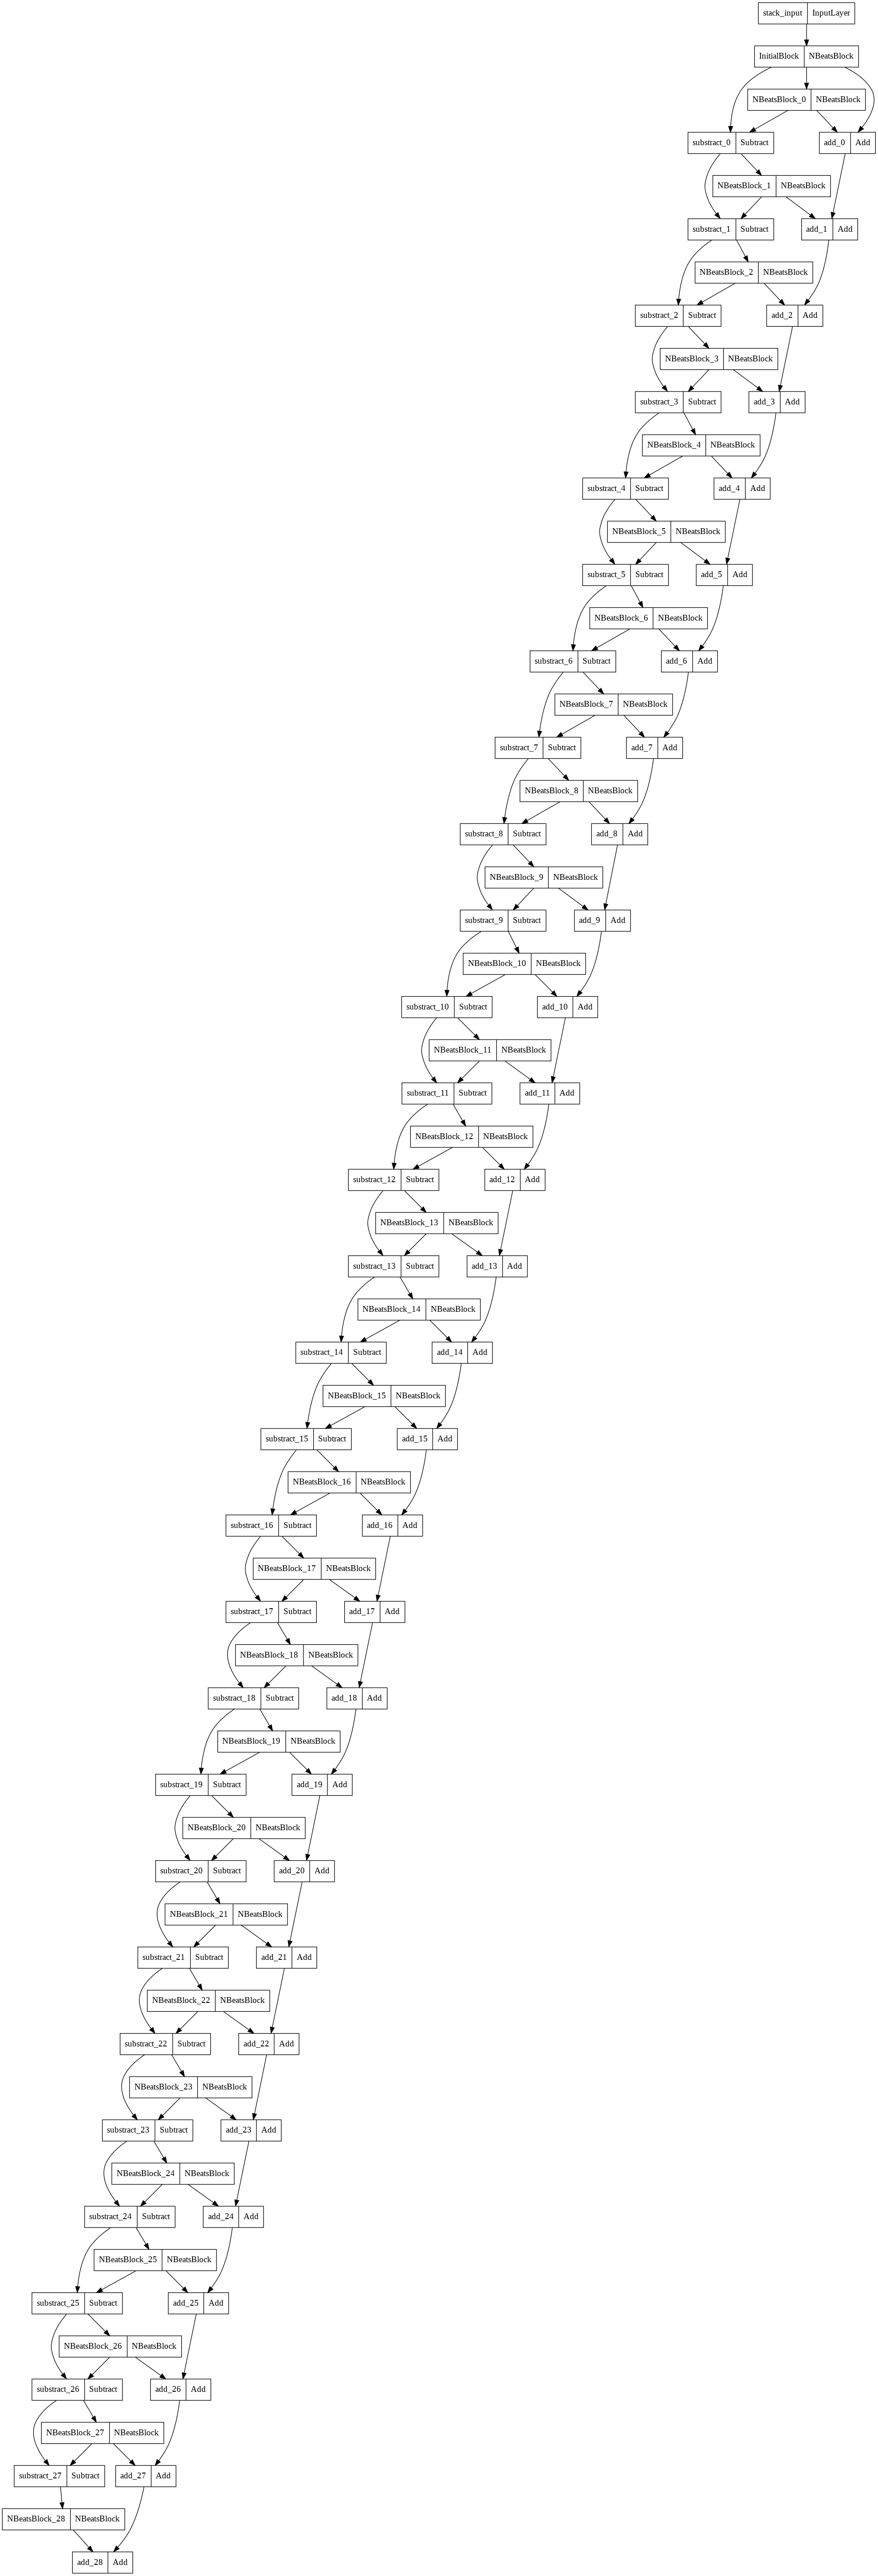

In [ ]:
# plot the N-BEATS model and inspect the architecture

from tensorflow.keras.utils import plot_model

plot_model(model_7)

## Model 8: Creating an ensemble (stacking different models together)

In [ ]:
HORIZON,WINDOW

(1, 7)

###  Constructing and fitting and ensemble of models (using different loss functions)

In [ ]:
def get_ensemble_models(horizon=HORIZON,
                        train_data=train_dataset,
                        test_data=test_dataset,
                        num_iter=10,
                        num_epochs=1000,
                        loss_fns=["mae","mse","mape"]):
  
  """
  Returns a list of num_iter models each trained on MAE, MSE and MAPE loss.
  """

  # make empty list for trained ensemble models
  ensemble_models=[]

  # create num_iter number of models per loss function

  for i in range(num_iter):
    
    # build and fit a new model with different loss function
    
    for loss_function in loss_fns:
      print(f"Optimizing model by reducing: {loss_function} for {num_epochs} epochs, model number: {i}")

      # construct a simple model

      model=tf.keras.Sequential([
          layers.Dense(128,kernel_initializer="he_normal",activation="relu"),
          layers.Dense(128,kernel_initializer="he_normal",activation="relu"),
          layers.Dense(HORIZON)
      ])
      
      # compile the model

      model.compile(loss=loss_function,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["mae","mse"])
      
      # fit the model

      model.fit(train_data,
                epochs=num_epochs,
                verbose=1,
                validation_data=test_data,
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                            patience=200,
                                                            restore_best_weights=True),
                           tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                                patience=100,
                                                                verbose=1)])
      
      # append fitted model to list of ensemble models

      ensemble_models.append(model)

  return ensemble_models
   

In [ ]:
# get list of trained ensemble models

ensemble_models=get_ensemble_models(num_iter=5,
                                    num_epochs=1000)


Streaming output truncated to the last 5000 lines.
Epoch 732/1000
3/3 [==============================] - 0s 22ms/step - loss: 2.4346 - mae: 124.1230 - mse: 79958.0469 - val_loss: 2.8794 - val_mae: 1193.2380 - val_mse: 2822898.2500 - lr: 1.0000e-05
Epoch 733/1000
3/3 [==============================] - 0s 13ms/step - loss: 2.4346 - mae: 124.1252 - mse: 79972.6172 - val_loss: 2.8794 - val_mae: 1193.2860 - val_mse: 2823192.7500 - lr: 1.0000e-05
Epoch 734/1000
3/3 [==============================] - 0s 12ms/step - loss: 2.4345 - mae: 124.1240 - mse: 79973.1953 - val_loss: 2.8793 - val_mae: 1193.2015 - val_mse: 2822706.2500 - lr: 1.0000e-05
Epoch 735/1000
3/3 [==============================] - 0s 16ms/step - loss: 2.4345 - mae: 124.1227 - mse: 79959.6641 - val_loss: 2.8793 - val_mae: 1193.1444 - val_mse: 2822384.2500 - lr: 1.0000e-05
Epoch 736/1000
3/3 [==============================] - 0s 14ms/step - loss: 2.4346 - mae: 124.1232 - mse: 79959.7422 - val_loss: 2.8794 - val_mae: 1193.2319 - val

In [ ]:
len(ensemble_models)


15

In [ ]:
ensemble_models

### Make predictions with our ensemble model

In [ ]:
# create a function which uses a list of trained models to make and return a list of predictions

def make_ensemble_preds(ensemble_models,data):
  ensemble_preds=[]

  for model in ensemble_models:
    
    preds=model.predict(data)
    
    ensemble_preds.append(preds)
  return tf.constant(tf.squeeze(ensemble_preds))


In [ ]:
ensemble_preds=make_ensemble_preds(ensemble_models=ensemble_models,
                                   data=test_dataset)

ensemble_preds


<tf.Tensor: shape=(15, 551), dtype=float32, numpy=
array([[10566.373, 10671.718, 10758.947, ..., 46497.1  , 45439.105,
        43667.38 ],
       [10560.133, 10650.593, 10800.85 , ..., 46526.043, 45715.316,
        42650.18 ],
       [10538.34 , 10669.008, 10792.37 , ..., 46580.383, 45581.27 ,
        43303.25 ],
       ...,
       [10580.67 , 10655.98 , 10761.299, ..., 46555.812, 45737.793,
        43922.38 ],
       [10559.053, 10645.597, 10767.977, ..., 46403.613, 45688.105,
        43166.043],
       [10546.636, 10660.621, 10792.621, ..., 46635.855, 45668.176,
        43361.832]], dtype=float32)>

In [ ]:
ensemble_preds

<tf.Tensor: shape=(15, 551), dtype=float32, numpy=
array([[10566.373, 10671.718, 10758.947, ..., 46497.1  , 45439.105,
        43667.38 ],
       [10560.133, 10650.593, 10800.85 , ..., 46526.043, 45715.316,
        42650.18 ],
       [10538.34 , 10669.008, 10792.37 , ..., 46580.383, 45581.27 ,
        43303.25 ],
       ...,
       [10580.67 , 10655.98 , 10761.299, ..., 46555.812, 45737.793,
        43922.38 ],
       [10559.053, 10645.597, 10767.977, ..., 46403.613, 45688.105,
        43166.043],
       [10546.636, 10660.621, 10792.621, ..., 46635.855, 45668.176,
        43361.832]], dtype=float32)>

In [ ]:
ensemble_mean=tf.reduce_mean(ensemble_preds,axis=0)

ensemble_mean[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([10582.732, 10675.316, 10789.186, 10631.935, 10659.19 , 10912.457,
       11080.779, 11265.765, 11396.478, 11585.733], dtype=float32)>

In [ ]:
ensemble_median=np.median(ensemble_preds,axis=0)

ensemble_median[:10]

array([10566.373, 10669.008, 10792.37 , 10625.627, 10643.387, 10910.626,
       11082.727, 11267.917, 11392.849, 11589.884], dtype=float32)

In [ ]:
# evaluate ensemble model predictions

ensemble_results=evaluate_preds(y_true=y_test,
                                y_pred=ensemble_mean)
ensemble_results


{'mae': 1197.3678,
 'mape': 2.892499,
 'mase': 1.0095696,
 'mse': 2847471.8,
 'rmse': 1687.4453}

In [ ]:
# evaluate ensemble model predictions

ensemble_results=evaluate_preds(y_true=y_test,
                                y_pred=ensemble_median)
ensemble_results


{'mae': 1196.952,
 'mape': 2.8926296,
 'mase': 1.009219,
 'mse': 2840544.8,
 'rmse': 1685.3916}

In [ ]:
model_1_results

{'mae': 1200.7169,
 'mape': 2.902458,
 'mase': 1.0123935,
 'mse': 2871865.5,
 'rmse': 1694.658}

### Plotting the prediction intervals (uncertainity estimates) of our ensemble


One way to get 95% confidence prediction intervals for a deep learning model is the bootstrap method:

1. Take he predictions from a number of randomly initialized models.
2. Measure the standard deviation of the predictions
3. Multiply the standard deviation by 1.96(assume the distribution is normal, 95% of observations fall within 1.96 standard deviation of the mean)
4. Get the prediction interval upper and lower bounds, add and subtract the value in 3 to the mean of the prediction made in 1.




In [ ]:

def get_upper_lower(preds): # take predictions from a number of randomly initilized models

  # measure the standard deviation of the predictions
  std=tf.math.reduce_std(preds,axis=0)

  # multiply the std by 1.96
  interval=1.96*std

  # get the prediction interval upper and lower bounds
  preds_mean=tf.reduce_mean(preds,axis=0)
  lower,upper=preds_mean-interval,preds_mean+interval


  return lower,upper

In [ ]:
# get upper and lower bounds of the 95% percent prediction interval

lower,upper=get_upper_lower(preds=ensemble_preds)
upper[:10],lower[:10]

(<tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([10709.336, 10742.922, 10846.44 , 10733.926, 10775.954, 10980.572,
        11139.368, 11348.42 , 11455.287, 11636.405], dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([10456.129, 10607.711, 10731.931, 10529.943, 10542.427, 10844.342,
        11022.19 , 11183.109, 11337.668, 11535.062], dtype=float32)>)

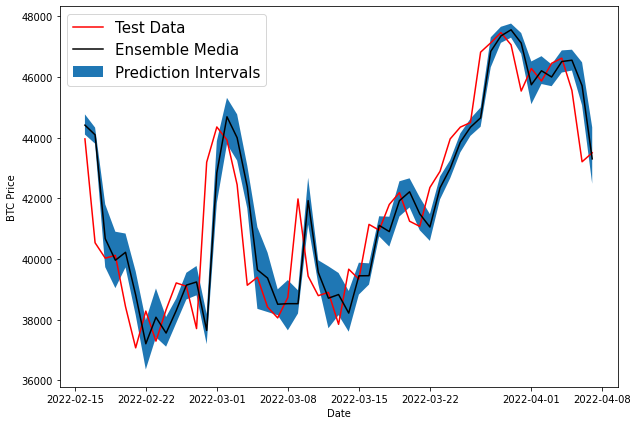

In [ ]:
# get the median/mean values of ensemble preds

ensemble_median=np.median(ensemble_preds,axis=0)

# plot the median of our ensemble preds along with the prediction intervals

offset=500
plt.figure(figsize=(10,7))
plt.plot(X_test.index[offset:],y_test[offset:],"r",label="Test Data")
plt.plot(X_test.index[offset:],ensemble_median[offset:],"k-",label="Ensemble Media")
plt.xlabel("Date")
plt.ylabel("BTC Price")

# plot upper and lower bound
plt.fill_between(X_test.index[offset:],
             lower[offset:],
             upper[offset:],
             label="Prediction Intervals")
plt.legend(loc="upper left",fontsize=15)

## Model 9: Train a model on the full historical data to make predictions into the future

In [ ]:
HORIZON=1
WINDOW=7

In [ ]:
bitcoin_prices_windowed.head()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2014-09-17,457.334015,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-18,424.440002,25,457.334015,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-19,394.795990,25,424.440002,457.334015,NaN,NaN,NaN,NaN,NaN
2014-09-20,408.903992,25,394.795990,424.440002,457.334015,NaN,NaN,NaN,NaN
2014-09-21,398.821014,25,408.903992,394.795990,424.440002,457.334015,NaN,NaN,NaN


In [ ]:
# train model on whole data to make predictions for the next day

X_all = bitcoin_prices_windowed.dropna().drop(["Price","block_reward"],axis=1).to_numpy()

y_all=bitcoin_prices_windowed.dropna()["Price"].to_numpy()

len(X_all),len(y_all)

(2753, 2753)

In [ ]:
X_all[:10],y_all[:10]


(array([[435.790985, 402.152008, 398.821014, 408.903992, 394.79599 ,
         424.440002, 457.334015],
        [423.204987, 435.790985, 402.152008, 398.821014, 408.903992,
         394.79599 , 424.440002],
        [411.574005, 423.204987, 435.790985, 402.152008, 398.821014,
         408.903992, 394.79599 ],
        [404.424988, 411.574005, 423.204987, 435.790985, 402.152008,
         398.821014, 408.903992],
        [399.519989, 404.424988, 411.574005, 423.204987, 435.790985,
         402.152008, 398.821014],
        [377.181   , 399.519989, 404.424988, 411.574005, 423.204987,
         435.790985, 402.152008],
        [375.46701 , 377.181   , 399.519989, 404.424988, 411.574005,
         423.204987, 435.790985],
        [386.944   , 375.46701 , 377.181   , 399.519989, 404.424988,
         411.574005, 423.204987],
        [383.61499 , 386.944   , 375.46701 , 377.181   , 399.519989,
         404.424988, 411.574005],
        [375.071991, 383.61499 , 386.944   , 375.46701 , 377.181   ,
    

In [ ]:
# turn data into efficient running tensors

features_dataset_all=tf.data.Dataset.from_tensor_slices(X_all)
labels_dataset_all=tf.data.Dataset.from_tensor_slices(y_all)

# combine features and labels

dataset_all=tf.data.Dataset.zip((features_dataset_all,labels_dataset_all))

# batch and prefetch for optimal performance

BATCH_SIZE=1024

dataset_all=dataset_all.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

dataset_all

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [ ]:
tf.random.set_seed(42)

# create a model
  
model_9=tf.keras.Sequential([
          layers.Dense(128,activation="relu"),
          layers.Dense(128,activation="relu"),
          layers.Dense(HORIZON)
],name="model_9_future_model")

# compile the model

model_9.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam())


model_9.fit(dataset_all,
            epochs=100,
            verbose=1,
            validation_data=dataset_all,
            callbacks=[create_model_checkpoint(model_name=model_9.name)])


Epoch 1/100
1/3 [=========>....................] - ETA: 0s - loss: 547.9240INFO:tensorflow:Assets written to: model_experiments/model_9_future_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_9_future_model/assets


3/3 [==============================] - 1s 384ms/step - loss: 7737.0093 - val_loss: 6075.2505
Epoch 2/100
1/3 [=========>....................] - ETA: 0s - loss: 322.9260INFO:tensorflow:Assets written to: model_experiments/model_9_future_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_9_future_model/assets


3/3 [==============================] - 1s 323ms/step - loss: 4180.4800 - val_loss: 2558.9834
Epoch 3/100
1/3 [=========>....................] - ETA: 0s - loss: 138.1916INFO:tensorflow:Assets written to: model_experiments/model_9_future_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_9_future_model/assets


3/3 [==============================] - 1s 563ms/step - loss: 838.2103 - val_loss: 1056.5874
Epoch 4/100
3/3 [==============================] - 0s 29ms/step - loss: 2616.8584 - val_loss: 2848.4512
Epoch 5/100
3/3 [==============================] - 0s 19ms/step - loss: 2774.1677 - val_loss: 2236.9519
Epoch 6/100
1/3 [=========>....................] - ETA: 0s - loss: 113.4230INFO:tensorflow:Assets written to: model_experiments/model_9_future_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_9_future_model/assets


3/3 [==============================] - 1s 343ms/step - loss: 1436.6586 - val_loss: 742.8619
Epoch 7/100
3/3 [==============================] - 0s 18ms/step - loss: 801.4782 - val_loss: 1061.6881
Epoch 8/100
3/3 [==============================] - 0s 31ms/step - loss: 1362.5796 - val_loss: 1251.7235
Epoch 9/100
1/3 [=========>....................] - ETA: 0s - loss: 68.7028INFO:tensorflow:Assets written to: model_experiments/model_9_future_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_9_future_model/assets


3/3 [==============================] - 1s 331ms/step - loss: 1006.0106 - val_loss: 706.3249
Epoch 10/100
3/3 [==============================] - 0s 16ms/step - loss: 609.7105 - val_loss: 710.4178
Epoch 11/100
3/3 [==============================] - 0s 17ms/step - loss: 885.7824 - val_loss: 810.7991
Epoch 12/100
1/3 [=========>....................] - ETA: 0s - loss: 37.3233INFO:tensorflow:Assets written to: model_experiments/model_9_future_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_9_future_model/assets


3/3 [==============================] - 1s 346ms/step - loss: 672.3581 - val_loss: 570.9077
Epoch 13/100
3/3 [==============================] - 0s 18ms/step - loss: 642.6964 - val_loss: 672.0525
Epoch 14/100
3/3 [==============================] - 0s 18ms/step - loss: 670.9711 - val_loss: 584.7283
Epoch 15/100
3/3 [==============================] - 0s 18ms/step - loss: 553.6028 - val_loss: 576.5549
Epoch 16/100
3/3 [==============================] - 0s 19ms/step - loss: 622.2430 - val_loss: 572.9443
Epoch 17/100
1/3 [=========>....................] - ETA: 0s - loss: 24.6858INFO:tensorflow:Assets written to: model_experiments/model_9_future_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_9_future_model/assets


3/3 [==============================] - 1s 348ms/step - loss: 540.7872 - val_loss: 544.1285
Epoch 18/100
3/3 [==============================] - 0s 19ms/step - loss: 570.9246 - val_loss: 545.4377
Epoch 19/100
1/3 [=========>....................] - ETA: 0s - loss: 24.7310INFO:tensorflow:Assets written to: model_experiments/model_9_future_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_9_future_model/assets


3/3 [==============================] - 1s 366ms/step - loss: 526.3301 - val_loss: 530.1087
Epoch 20/100
1/3 [=========>....................] - ETA: 0s - loss: 22.6971INFO:tensorflow:Assets written to: model_experiments/model_9_future_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_9_future_model/assets


3/3 [==============================] - 1s 351ms/step - loss: 549.0045 - val_loss: 529.9461
Epoch 21/100
1/3 [=========>....................] - ETA: 0s - loss: 22.6909INFO:tensorflow:Assets written to: model_experiments/model_9_future_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_9_future_model/assets


3/3 [==============================] - 1s 345ms/step - loss: 519.5729 - val_loss: 520.6920
Epoch 22/100
1/3 [=========>....................] - ETA: 0s - loss: 22.9569INFO:tensorflow:Assets written to: model_experiments/model_9_future_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_9_future_model/assets


3/3 [==============================] - 1s 326ms/step - loss: 527.5587 - val_loss: 514.5629
Epoch 23/100
1/3 [=========>....................] - ETA: 0s - loss: 22.5360INFO:tensorflow:Assets written to: model_experiments/model_9_future_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_9_future_model/assets


3/3 [==============================] - 1s 347ms/step - loss: 511.2616 - val_loss: 512.3803
Epoch 24/100
1/3 [=========>....................] - ETA: 0s - loss: 21.8610INFO:tensorflow:Assets written to: model_experiments/model_9_future_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_9_future_model/assets


3/3 [==============================] - 1s 377ms/step - loss: 510.8983 - val_loss: 502.7878
Epoch 25/100
1/3 [=========>....................] - ETA: 0s - loss: 21.5409INFO:tensorflow:Assets written to: model_experiments/model_9_future_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_9_future_model/assets


3/3 [==============================] - 1s 353ms/step - loss: 505.6077 - val_loss: 502.3076
Epoch 26/100
1/3 [=========>....................] - ETA: 0s - loss: 21.9986INFO:tensorflow:Assets written to: model_experiments/model_9_future_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_9_future_model/assets


3/3 [==============================] - 1s 334ms/step - loss: 497.1348 - val_loss: 494.0815
Epoch 27/100
1/3 [=========>....................] - ETA: 0s - loss: 21.1307INFO:tensorflow:Assets written to: model_experiments/model_9_future_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_9_future_model/assets


3/3 [==============================] - 1s 337ms/step - loss: 498.5632 - val_loss: 491.3598
Epoch 28/100
1/3 [=========>....................] - ETA: 0s - loss: 20.9205INFO:tensorflow:Assets written to: model_experiments/model_9_future_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_9_future_model/assets


3/3 [==============================] - 1s 346ms/step - loss: 489.6754 - val_loss: 487.3343
Epoch 29/100
1/3 [=========>....................] - ETA: 0s - loss: 21.1089INFO:tensorflow:Assets written to: model_experiments/model_9_future_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_9_future_model/assets


3/3 [==============================] - 1s 361ms/step - loss: 484.2543 - val_loss: 481.5387
Epoch 30/100
1/3 [=========>....................] - ETA: 0s - loss: 20.5296INFO:tensorflow:Assets written to: model_experiments/model_9_future_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_9_future_model/assets


3/3 [==============================] - 1s 338ms/step - loss: 483.0669 - val_loss: 477.8987
Epoch 31/100
1/3 [=========>....................] - ETA: 0s - loss: 20.3007INFO:tensorflow:Assets written to: model_experiments/model_9_future_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_9_future_model/assets


3/3 [==============================] - 1s 381ms/step - loss: 477.5927 - val_loss: 474.1352
Epoch 32/100
1/3 [=========>....................] - ETA: 0s - loss: 20.3926INFO:tensorflow:Assets written to: model_experiments/model_9_future_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_9_future_model/assets


3/3 [==============================] - 1s 330ms/step - loss: 471.1625 - val_loss: 470.0058
Epoch 33/100
1/3 [=========>....................] - ETA: 0s - loss: 19.8941INFO:tensorflow:Assets written to: model_experiments/model_9_future_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_9_future_model/assets


3/3 [==============================] - 1s 355ms/step - loss: 468.8327 - val_loss: 465.8746
Epoch 34/100
1/3 [=========>....................] - ETA: 0s - loss: 19.7050INFO:tensorflow:Assets written to: model_experiments/model_9_future_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_9_future_model/assets


3/3 [==============================] - 1s 628ms/step - loss: 464.0559 - val_loss: 461.9589
Epoch 35/100
1/3 [=========>....................] - ETA: 0s - loss: 19.7270INFO:tensorflow:Assets written to: model_experiments/model_9_future_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_9_future_model/assets


3/3 [==============================] - 1s 349ms/step - loss: 459.7079 - val_loss: 457.9801
Epoch 36/100
1/3 [=========>....................] - ETA: 0s - loss: 19.3613INFO:tensorflow:Assets written to: model_experiments/model_9_future_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_9_future_model/assets


3/3 [==============================] - 1s 334ms/step - loss: 456.1743 - val_loss: 454.4041
Epoch 37/100
1/3 [=========>....................] - ETA: 0s - loss: 19.1226INFO:tensorflow:Assets written to: model_experiments/model_9_future_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_9_future_model/assets


3/3 [==============================] - 1s 362ms/step - loss: 452.4056 - val_loss: 450.4690
Epoch 38/100
1/3 [=========>....................] - ETA: 0s - loss: 18.9977INFO:tensorflow:Assets written to: model_experiments/model_9_future_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_9_future_model/assets


3/3 [==============================] - 1s 337ms/step - loss: 448.6118 - val_loss: 446.7855
Epoch 39/100
1/3 [=========>....................] - ETA: 0s - loss: 18.8315INFO:tensorflow:Assets written to: model_experiments/model_9_future_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_9_future_model/assets


3/3 [==============================] - 1s 336ms/step - loss: 444.8445 - val_loss: 443.2065
Epoch 40/100
1/3 [=========>....................] - ETA: 0s - loss: 18.6057INFO:tensorflow:Assets written to: model_experiments/model_9_future_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_9_future_model/assets


3/3 [==============================] - 1s 356ms/step - loss: 441.5519 - val_loss: 439.5280
Epoch 41/100
1/3 [=========>....................] - ETA: 0s - loss: 18.4735INFO:tensorflow:Assets written to: model_experiments/model_9_future_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_9_future_model/assets


3/3 [==============================] - 1s 327ms/step - loss: 438.5574 - val_loss: 436.0983
Epoch 42/100
1/3 [=========>....................] - ETA: 0s - loss: 18.2902INFO:tensorflow:Assets written to: model_experiments/model_9_future_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_9_future_model/assets


3/3 [==============================] - 1s 319ms/step - loss: 435.9559 - val_loss: 432.8653
Epoch 43/100
1/3 [=========>....................] - ETA: 0s - loss: 18.1171INFO:tensorflow:Assets written to: model_experiments/model_9_future_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_9_future_model/assets


3/3 [==============================] - 1s 345ms/step - loss: 433.7342 - val_loss: 429.6231
Epoch 44/100
1/3 [=========>....................] - ETA: 0s - loss: 17.9735INFO:tensorflow:Assets written to: model_experiments/model_9_future_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_9_future_model/assets


3/3 [==============================] - 1s 364ms/step - loss: 433.3353 - val_loss: 426.7426
Epoch 45/100
1/3 [=========>....................] - ETA: 0s - loss: 17.9193INFO:tensorflow:Assets written to: model_experiments/model_9_future_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_9_future_model/assets


3/3 [==============================] - 1s 348ms/step - loss: 442.9437 - val_loss: 423.7727
Epoch 46/100
1/3 [=========>....................] - ETA: 0s - loss: 17.6840INFO:tensorflow:Assets written to: model_experiments/model_9_future_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_9_future_model/assets


3/3 [==============================] - 1s 327ms/step - loss: 464.4104 - val_loss: 421.4846
Epoch 47/100
3/3 [==============================] - 0s 20ms/step - loss: 486.0622 - val_loss: 422.4146
Epoch 48/100
3/3 [==============================] - 0s 21ms/step - loss: 489.0778 - val_loss: 423.7685
Epoch 49/100
3/3 [==============================] - 0s 19ms/step - loss: 472.4520 - val_loss: 424.3157
Epoch 50/100
1/3 [=========>....................] - ETA: 0s - loss: 18.6023INFO:tensorflow:Assets written to: model_experiments/model_9_future_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_9_future_model/assets


3/3 [==============================] - 1s 348ms/step - loss: 444.4657 - val_loss: 420.2244
Epoch 51/100
1/3 [=========>....................] - ETA: 0s - loss: 17.5349INFO:tensorflow:Assets written to: model_experiments/model_9_future_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_9_future_model/assets


3/3 [==============================] - 1s 327ms/step - loss: 426.1063 - val_loss: 416.7783
Epoch 52/100
1/3 [=========>....................] - ETA: 0s - loss: 17.8913INFO:tensorflow:Assets written to: model_experiments/model_9_future_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_9_future_model/assets


3/3 [==============================] - 1s 330ms/step - loss: 412.9834 - val_loss: 412.7007
Epoch 53/100
1/3 [=========>....................] - ETA: 0s - loss: 17.1530INFO:tensorflow:Assets written to: model_experiments/model_9_future_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_9_future_model/assets


3/3 [==============================] - 1s 333ms/step - loss: 410.9238 - val_loss: 409.7133
Epoch 54/100
1/3 [=========>....................] - ETA: 0s - loss: 17.1635INFO:tensorflow:Assets written to: model_experiments/model_9_future_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_9_future_model/assets


3/3 [==============================] - 1s 324ms/step - loss: 410.7848 - val_loss: 408.0231
Epoch 55/100
1/3 [=========>....................] - ETA: 0s - loss: 16.9769INFO:tensorflow:Assets written to: model_experiments/model_9_future_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_9_future_model/assets


3/3 [==============================] - 1s 350ms/step - loss: 412.4462 - val_loss: 406.3804
Epoch 56/100
1/3 [=========>....................] - ETA: 0s - loss: 16.9132INFO:tensorflow:Assets written to: model_experiments/model_9_future_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_9_future_model/assets


3/3 [==============================] - 1s 338ms/step - loss: 414.2664 - val_loss: 404.6888
Epoch 57/100
1/3 [=========>....................] - ETA: 0s - loss: 16.8788INFO:tensorflow:Assets written to: model_experiments/model_9_future_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_9_future_model/assets


3/3 [==============================] - 1s 621ms/step - loss: 418.8480 - val_loss: 403.0574
Epoch 58/100
1/3 [=========>....................] - ETA: 0s - loss: 16.8242INFO:tensorflow:Assets written to: model_experiments/model_9_future_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_9_future_model/assets


3/3 [==============================] - 1s 359ms/step - loss: 438.9857 - val_loss: 401.8131
Epoch 59/100
1/3 [=========>....................] - ETA: 0s - loss: 16.6944INFO:tensorflow:Assets written to: model_experiments/model_9_future_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_9_future_model/assets


3/3 [==============================] - 1s 327ms/step - loss: 488.6700 - val_loss: 400.5945
Epoch 60/100
3/3 [==============================] - 0s 20ms/step - loss: 551.9446 - val_loss: 418.9136
Epoch 61/100
3/3 [==============================] - 0s 19ms/step - loss: 495.7495 - val_loss: 415.3411
Epoch 62/100
3/3 [==============================] - 0s 18ms/step - loss: 447.2907 - val_loss: 406.0434
Epoch 63/100
3/3 [==============================] - 0s 22ms/step - loss: 419.4875 - val_loss: 401.0703
Epoch 64/100
1/3 [=========>....................] - ETA: 0s - loss: 16.6493INFO:tensorflow:Assets written to: model_experiments/model_9_future_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_9_future_model/assets


3/3 [==============================] - 1s 361ms/step - loss: 407.2435 - val_loss: 396.4250
Epoch 65/100
1/3 [=========>....................] - ETA: 0s - loss: 16.6793INFO:tensorflow:Assets written to: model_experiments/model_9_future_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_9_future_model/assets


3/3 [==============================] - 1s 371ms/step - loss: 406.1766 - val_loss: 395.3157
Epoch 66/100
1/3 [=========>....................] - ETA: 0s - loss: 16.4225INFO:tensorflow:Assets written to: model_experiments/model_9_future_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_9_future_model/assets


3/3 [==============================] - 1s 355ms/step - loss: 410.8711 - val_loss: 393.9314
Epoch 67/100
1/3 [=========>....................] - ETA: 0s - loss: 16.4303INFO:tensorflow:Assets written to: model_experiments/model_9_future_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_9_future_model/assets


3/3 [==============================] - 1s 347ms/step - loss: 425.4751 - val_loss: 393.4014
Epoch 68/100
1/3 [=========>....................] - ETA: 0s - loss: 16.3373INFO:tensorflow:Assets written to: model_experiments/model_9_future_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_9_future_model/assets


3/3 [==============================] - 1s 349ms/step - loss: 444.9252 - val_loss: 392.1185
Epoch 69/100
3/3 [==============================] - 0s 18ms/step - loss: 478.3972 - val_loss: 394.9072
Epoch 70/100
3/3 [==============================] - 0s 18ms/step - loss: 491.6832 - val_loss: 401.5261
Epoch 71/100
3/3 [==============================] - 0s 18ms/step - loss: 462.1536 - val_loss: 399.9651
Epoch 72/100
3/3 [==============================] - 0s 17ms/step - loss: 435.7754 - val_loss: 393.3944
Epoch 73/100
1/3 [=========>....................] - ETA: 0s - loss: 16.9304INFO:tensorflow:Assets written to: model_experiments/model_9_future_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_9_future_model/assets


3/3 [==============================] - 1s 330ms/step - loss: 426.7256 - val_loss: 391.3673
Epoch 74/100
1/3 [=========>....................] - ETA: 0s - loss: 16.2125INFO:tensorflow:Assets written to: model_experiments/model_9_future_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_9_future_model/assets


3/3 [==============================] - 1s 339ms/step - loss: 428.1994 - val_loss: 388.9413
Epoch 75/100
3/3 [==============================] - 0s 19ms/step - loss: 440.1038 - val_loss: 389.3944
Epoch 76/100
3/3 [==============================] - 0s 24ms/step - loss: 454.9207 - val_loss: 389.8136
Epoch 77/100
3/3 [==============================] - 0s 18ms/step - loss: 462.1124 - val_loss: 393.3626
Epoch 78/100
3/3 [==============================] - 0s 17ms/step - loss: 449.9175 - val_loss: 391.5228
Epoch 79/100
3/3 [==============================] - 0s 17ms/step - loss: 438.7008 - val_loss: 390.9278
Epoch 80/100
1/3 [=========>....................] - ETA: 0s - loss: 16.2456INFO:tensorflow:Assets written to: model_experiments/model_9_future_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_9_future_model/assets


3/3 [==============================] - 1s 367ms/step - loss: 428.0920 - val_loss: 388.0293
Epoch 81/100
1/3 [=========>....................] - ETA: 0s - loss: 16.6290INFO:tensorflow:Assets written to: model_experiments/model_9_future_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_9_future_model/assets


3/3 [==============================] - 1s 329ms/step - loss: 422.8670 - val_loss: 386.9486
Epoch 82/100
1/3 [=========>....................] - ETA: 0s - loss: 16.0461INFO:tensorflow:Assets written to: model_experiments/model_9_future_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_9_future_model/assets


3/3 [==============================] - 1s 326ms/step - loss: 423.9990 - val_loss: 384.7465
Epoch 83/100
3/3 [==============================] - 0s 19ms/step - loss: 434.4887 - val_loss: 385.4595
Epoch 84/100
3/3 [==============================] - 0s 19ms/step - loss: 444.7651 - val_loss: 384.8860
Epoch 85/100
3/3 [==============================] - 0s 20ms/step - loss: 455.6298 - val_loss: 390.0910
Epoch 86/100
3/3 [==============================] - 0s 19ms/step - loss: 437.6150 - val_loss: 387.5127
Epoch 87/100
3/3 [==============================] - 0s 17ms/step - loss: 424.2860 - val_loss: 385.6683
Epoch 88/100
1/3 [=========>....................] - ETA: 0s - loss: 16.0306INFO:tensorflow:Assets written to: model_experiments/model_9_future_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_9_future_model/assets


3/3 [==============================] - 1s 338ms/step - loss: 416.3878 - val_loss: 382.0126
Epoch 89/100
1/3 [=========>....................] - ETA: 0s - loss: 16.1907INFO:tensorflow:Assets written to: model_experiments/model_9_future_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_9_future_model/assets


3/3 [==============================] - 1s 338ms/step - loss: 421.7070 - val_loss: 381.8264
Epoch 90/100
1/3 [=========>....................] - ETA: 0s - loss: 15.8480INFO:tensorflow:Assets written to: model_experiments/model_9_future_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_9_future_model/assets


3/3 [==============================] - 1s 358ms/step - loss: 430.9167 - val_loss: 380.6581
Epoch 91/100
3/3 [==============================] - 0s 18ms/step - loss: 446.3474 - val_loss: 384.1666
Epoch 92/100
3/3 [==============================] - 0s 17ms/step - loss: 443.1320 - val_loss: 384.3153
Epoch 93/100
3/3 [==============================] - 0s 21ms/step - loss: 434.6206 - val_loss: 383.8363
Epoch 94/100
3/3 [==============================] - 0s 20ms/step - loss: 425.9388 - val_loss: 381.3830
Epoch 95/100
3/3 [==============================] - 0s 17ms/step - loss: 423.8399 - val_loss: 380.9826
Epoch 96/100
1/3 [=========>....................] - ETA: 0s - loss: 15.8423INFO:tensorflow:Assets written to: model_experiments/model_9_future_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_9_future_model/assets


3/3 [==============================] - 1s 343ms/step - loss: 423.3360 - val_loss: 379.4468
Epoch 97/100
3/3 [==============================] - 0s 18ms/step - loss: 427.6364 - val_loss: 379.6790
Epoch 98/100
3/3 [==============================] - 0s 19ms/step - loss: 431.3790 - val_loss: 379.8796
Epoch 99/100
3/3 [==============================] - 0s 18ms/step - loss: 430.9579 - val_loss: 379.8844
Epoch 100/100
3/3 [==============================] - 0s 21ms/step - loss: 429.9453 - val_loss: 379.8958


### Make predictions into the future


In [ ]:
FUTURE_TIMESTEPS=14


In [ ]:
# create function to make predictions into future

def make_future_forecasts(values,model,FUTURE_TIMESTEPS,window_size=WINDOW) -> list:

  """
  make future FUTURE_TIMESTEPS forecasts after value ends
  return future forecasts as a list of floats
  """

  # create empty list for future forecasts and prepare data to forecast on

  future_forecast=[]
  last_window=values[-WINDOW:]

  # make FUTURE_TIMESTEPS number of predictions, altering the data which we predict on

  for _ in range(FUTURE_TIMESTEPS):

    # predict on last window and then append it 
    
    future_pred=model.predict(tf.expand_dims(last_window,axis=0))
    print(f"Predicting on:\n {last_window} -> Prediction: {tf.squeeze(future_pred).numpy()}\n")

    # append prediction to future_forecast
    future_forecast.append(tf.squeeze(future_pred).numpy())

    # update last window with new pred and get WINDOW most recent preds
    last_window=np.append(last_window,future_pred)[-WINDOW:]
    
  return future_forecast


In [ ]:
# make forecasts into the future

future_forecast=make_future_forecasts(values=y_all,
                                      model=model_9,
                                      FUTURE_TIMESTEPS=FUTURE_TIMESTEPS,
                                      window_size=WINDOW)


Predicting on:
 [46281.644531 45868.949219 46453.566406 46622.675781 45555.992188
 43206.738281 43503.847656] -> Prediction: 46244.61328125

Predicting on:
 [45868.949219   46453.566406   46622.675781   45555.992188
 43206.738281   43503.847656   46244.61328125] -> Prediction: 46018.5625

Predicting on:
 [46453.566406   46622.675781   45555.992188   43206.738281
 43503.847656   46244.61328125 46018.5625    ] -> Prediction: 46133.125

Predicting on:
 [46622.675781   45555.992188   43206.738281   43503.847656
 46244.61328125 46018.5625     46133.125     ] -> Prediction: 45501.34765625

Predicting on:
 [45555.992188   43206.738281   43503.847656   46244.61328125
 46018.5625     46133.125      45501.34765625] -> Prediction: 44476.30078125

Predicting on:
 [43206.738281   43503.847656   46244.61328125 46018.5625
 46133.125      45501.34765625 44476.30078125] -> Prediction: 43539.4609375

Predicting on:
 [43503.847656   46244.61328125 46018.5625     46133.125
 45501.34765625 44476.30078125 4

### Plot the future forecasts

In [ ]:
future_forecast

[46244.613,
 46018.562,
 46133.125,
 45501.348,
 44476.3,
 43539.46,
 44651.2,
 46105.895,
 45796.22,
 45455.332,
 44697.934,
 44125.81,
 44110.414,
 45190.81]

In [ ]:
def get_future_dates(start_date,into_future,offset=1):

  """ 
  returns array of datetime values ranging from start_data to start_date+into_future

  """

  start_date=start_date+np.timedelta64(offset,"D")
  end_date=start_date+np.timedelta64(into_future,"D")

  return np.arange(start_date,end_date,dtype="datetime64[D]")


In [ ]:
# last timestep of timesteps

last_timestep=bitcoin_prices.index[-1]
last_timestep

Timestamp('2022-04-07 00:00:00')

In [ ]:
# get next 2 weeks of timesteps

next_time_steps=get_future_dates(start_date=last_timestep,
                                 into_future=FUTURE_TIMESTEPS,offset=1)

next_time_steps

array(['2022-04-08', '2022-04-09', '2022-04-10', '2022-04-11',
       '2022-04-12', '2022-04-13', '2022-04-14', '2022-04-15',
       '2022-04-16', '2022-04-17', '2022-04-18', '2022-04-19',
       '2022-04-20', '2022-04-21'], dtype='datetime64[D]')

In [ ]:
# insert last timestep/final price into next time steps and future forecasts

next_time_steps=np.insert(next_time_steps,0,last_timestep)

future_forecast=np.insert(future_forecast,0,btc_price[-1])

next_time_steps,future_forecast

(array(['2022-04-07', '2022-04-08', '2022-04-09', '2022-04-10',
        '2022-04-11', '2022-04-12', '2022-04-13', '2022-04-14',
        '2022-04-15', '2022-04-16', '2022-04-17', '2022-04-18',
        '2022-04-19', '2022-04-20', '2022-04-21'], dtype='datetime64[D]'),
 array([43503.848, 46244.613, 46018.562, 46133.125, 45501.348, 44476.3  ,
        43539.46 , 44651.2  , 46105.895, 45796.22 , 45455.332, 44697.934,
        44125.81 , 44110.414, 45190.81 ], dtype=float32))

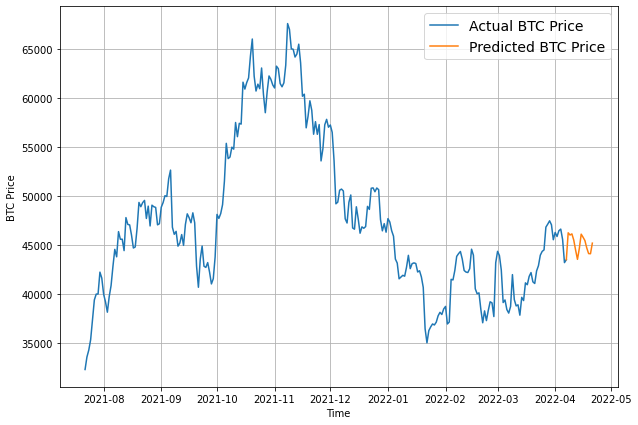

In [ ]:
# plot future price predictions of Bitcoin

plt.figure(figsize=(10,7))

plot_time_series(bitcoin_prices.index,btc_price,start=2500,format="-",label="Actual BTC Price")

plot_time_series(next_time_steps,future_forecast,format="-",label="Predicted BTC Price")



## Model 10: The turkey problem

In [ ]:
# Let's introduce a Turkey problem to our BTC data (price BTC falls 100x in one day)
btc_price_turkey = btc_price.copy()
btc_price_turkey[-1] = btc_price_turkey[-1] / 100 

In [ ]:
# Manufacture an extra price on the end (to showcase the Turkey problem)
btc_price_turkey[-10:]

[47465.730469,
 47062.664063,
 45538.675781,
 46281.644531,
 45868.949219,
 46453.566406,
 46622.675781,
 45555.992188,
 43206.738281,
 435.03847656]

In [ ]:
# Get the timesteps for the turkey problem 
btc_timesteps_turkey = np.array(bitcoin_prices.index)
btc_timesteps_turkey[-10:]

array(['2022-03-29T00:00:00.000000000', '2022-03-30T00:00:00.000000000',
       '2022-03-31T00:00:00.000000000', '2022-04-01T00:00:00.000000000',
       '2022-04-02T00:00:00.000000000', '2022-04-03T00:00:00.000000000',
       '2022-04-04T00:00:00.000000000', '2022-04-05T00:00:00.000000000',
       '2022-04-06T00:00:00.000000000', '2022-04-07T00:00:00.000000000'],
      dtype='datetime64[ns]')

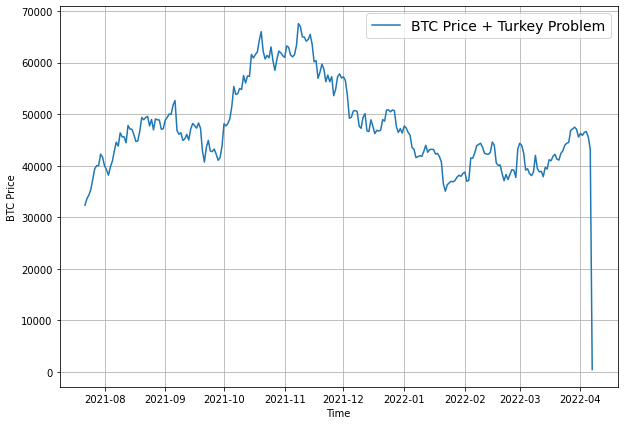

In [ ]:
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=btc_timesteps_turkey, 
                 values=btc_price_turkey, 
                 format="-", 
                 label="BTC Price + Turkey Problem", 
                 start=2500)

In [ ]:
# Create train and test sets for turkey problem data
full_windows, full_labels = make_windows(np.array(btc_price_turkey), window_size=WINDOW, horizon=HORIZON)
len(full_windows), len(full_labels)

X_train, X_test, y_train, y_test = make_train_test_splits(full_windows, full_labels)
len(X_train), len(X_test), len(y_train), len(y_test)

(2202, 551, 2202, 551)

### Building a turkey model (model to predict on turkey data)

In [ ]:
# Clone model 1 architecture for turkey model and fit the turkey model on the turkey data
turkey_model = tf.keras.models.clone_model(model_1)
turkey_model._name = "Turkey_Model"
turkey_model.compile(loss="mae",
                     optimizer=tf.keras.optimizers.Adam())
turkey_model.fit(X_train, y_train,
                 epochs=100,
                 verbose=0,
                 batch_size=128,
                 validation_data=(X_test, y_test),
                 callbacks=[create_model_checkpoint(turkey_model.name)])

INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: model_experiments/Turkey_Model/assets


In [ ]:
# Evaluate turkey model on test data
turkey_model.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 1275.5778


1275.5777587890625

In [ ]:
# Load best model and evaluate on test data
turkey_model = tf.keras.models.load_model("model_experiments/Turkey_Model/")
turkey_model.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 1275.5778


1275.5777587890625

In [ ]:
# Make predictions with Turkey model
turkey_preds = make_preds(turkey_model, X_test)
turkey_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([10567.915, 10668.292, 10799.924, 10656.078, 10667.647, 10904.435,
       11075.914, 11293.276, 11406.768, 11558.88 ], dtype=float32)>

In [ ]:
# Evaluate turkey preds
turkey_results = evaluate_preds(y_true=y_test,
                                y_pred=turkey_preds)
turkey_results

{'mae': 15487.225,
 'mape': 68.74074,
 'mase': 12.259878,
 'mse': 382268200.0,
 'rmse': 18728.896}

In [ ]:
model_1_results

{'mae': 1200.7169,
 'mape': 2.902458,
 'mase': 1.0123935,
 'mse': 2871865.5,
 'rmse': 1694.658}

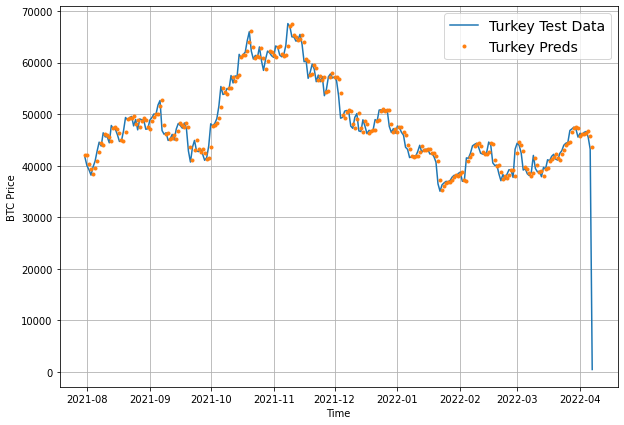

In [ ]:
plt.figure(figsize=(10, 7))
# plot_time_series(timesteps=btc_timesteps_turkey[:split_size], values=btc_price_turkey[:split_size], label="Train Data")
offset=300
plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):], 
                 values=btc_price_turkey[-len(y_test):], 
                 format="-", 
                 label="Turkey Test Data", start=offset)
plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):],
                 values=turkey_preds, 
                 label="Turkey Preds", 
                 start=offset);

## Compare Models

In [ ]:
# Compare different model results (w = window, h = horizon, e.g. w=7 means a window size of 7)
model_results = pd.DataFrame({"naive_model": naive_results,
                              "model_1_dense_w7_h1": model_1_results,
                              "model_2_dense_w30_h1": model_2_results,
                              "model_3_dense_w30_h7": model_3_results,
                              "model_4_CONV1D": model_4_results,
                              "model_5_LSTM": model_5_results,
                              "model_6_multivariate": model_6_results,
                              "model_8_NBEATs": model_7_results,
                              "model_9_ensemble": ensemble_results,
                              "model_10_turkey": turkey_results}).T
model_results.head(10)

,mae,mse,rmse,mape,mase
naive_model,1184.083740,2.807027e+06,1675.418457,2.854877,0.998369
model_1_dense_w7_h1,1200.716919,2.871866e+06,1694.657959,2.902458,1.012393
model_2_dense_w30_h1,1348.156738,3.398971e+06,1843.629883,3.251505,1.127711
model_3_dense_w30_h7,2648.183350,1.309638e+07,3027.996826,6.398058,2.219707
model_4_CONV1D,1231.421387,2.982096e+06,1726.874756,2.973312,1.038282
model_5_LSTM,1266.359375,3.075986e+06,1753.848755,3.060347,1.067740
model_6_multivariate,1198.450195,2.848132e+06,1687.640869,2.896246,1.010482
model_8_NBEATs,1254.451172,3.028004e+06,1740.115967,3.030619,1.057700
model_9_ensemble,1196.952026,2.840545e+06,1685.391602,2.892630,1.009219
model_10_turkey,15487.224609,3.822682e+08,18728.896484,68.740738,12.259878


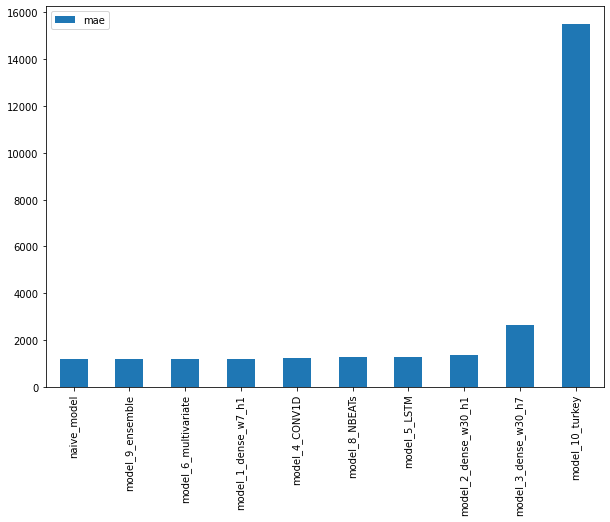

In [ ]:
# Sort model results by MAE and plot them
model_results[["mae"]].sort_values(by="mae").plot(figsize=(10, 7), kind="bar");